In [1]:
from IPython.display import Image, SVG
import Reaction_Library as RL 
from rdkit import Chem
import json
from rdkit.Chem import AllChem,Draw,Descriptors
import copy
import pandas as pd
import re
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

%pylab inline

testing inside util
Populating the interactive namespace from numpy and matplotlib


/Users/ajinich/miniconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# General Functions

Reduction Functions

In [4]:
def G1_function(metab_smiles):
    reactant = Chem.MolFromSmiles(metab_smiles)
    prod_list = []
    prod = RL.G1_carb_acid.RunReactants([reactant])
    if len(prod) > 0:
        for x in prod:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    return prod_list

def G2_function(metab_smiles):
    reactant = Chem.MolFromSmiles(metab_smiles)
    prod_list = []
    
    #Aldehyde reduction
    prod_1 = RL.G2_ald.RunReactants([reactant])
    if len(prod_1) > 0:
        for x in prod_1:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    #Ketone reduction        
    prod_2 = RL.G2_ket.RunReactants([reactant])
    if len(prod_2) > 0:
        for x in prod_2:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)

    #6 carbon ring reactions... 
    prod_3 = RL.G2_6c6r.RunReactants([reactant])
    if len(prod_3) > 0:
        for x in prod_3:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    prod_4 = RL.G2_6c5r.RunReactants([reactant])
    if len(prod_4) > 0:
        for x in prod_4:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    prod_5 = RL.G2_5c6r.RunReactants([reactant])
    if len(prod_5) > 0:
        for x in prod_5:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    prod_6 = RL.G2_5c5r.RunReactants([reactant])
    if len(prod_6) > 0:
        for x in prod_6:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    return prod_list

def G3_function(metab_smiles):
    reactant = Chem.MolFromSmiles(metab_smiles)
    prod_list = []
    
    #Aldehyde reduction
    prod_1 = RL.G3_ald.RunReactants([reactant])
    if len(prod_1) > 0:
        for x in prod_1:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    #Ketone reduction        
    prod_2 = RL.G3_ket.RunReactants([reactant])
    if len(prod_2) > 0:
        for x in prod_2:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    return prod_list

def G4_function(metab_smiles):
    reactant = Chem.MolFromSmiles(metab_smiles)
    prod_list = []
    # Hydroxyl in the end of a molecule
    prod_1 = RL.G4_end_hydr.RunReactants([reactant])
    if len(prod_1) > 0:
        for x in prod_1:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    # Hydroxyl in the middle of a molecule. 
    prod_2 = RL.G4_mid_hydr.RunReactants([reactant])
    if len(prod_2) > 0:
        for x in prod_2:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    prod_3 = RL.G4_arom_hydr.RunReactants([reactant])
    if len(prod_3) > 0:
        for x in prod_3:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    return prod_list

Oxidation Functions

In [5]:
def G1_function_ox(metab_smiles):
    reactant = Chem.MolFromSmiles(metab_smiles)
    prod_list = []
    prod = RL.G1_carb_acid_ox.RunReactants([reactant])
    if len(prod) > 0:
        for x in prod:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    return prod_list

def G2_function_ox(metab_smiles):
    reactant = Chem.MolFromSmiles(metab_smiles)
    prod_list = []
    
    #Aldehyde reduction
    prod_1 = RL.G2_ald_ox.RunReactants([reactant])
    if len(prod_1) > 0:
        for x in prod_1:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    #Ketone reduction        
    prod_2 = RL.G2_ket_ox.RunReactants([reactant])
    if len(prod_2) > 0:
        for x in prod_2:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    return prod_list

def G3_function_ox(metab_smiles):
    reactant = Chem.MolFromSmiles(metab_smiles)
    prod_list = []
    
    #Aldehyde reduction
    prod_1 = RL.G3_ald_ox.RunReactants([reactant])
    if len(prod_1) > 0:
        for x in prod_1:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    #Ketone reduction        
    prod_2 = RL.G3_ket_ox.RunReactants([reactant])
    if len(prod_2) > 0:
        for x in prod_2:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    return prod_list

def G4_function_ox(metab_smiles):
    reactant = Chem.MolFromSmiles(metab_smiles)
    prod_list = []
    # Hydroxyl in the end of a molecule
    prod_1 = RL.G4_end_hydr_ox.RunReactants([reactant])
    if len(prod_1) > 0:
        for x in prod_1:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    # Hydroxyl in the middle of a molecule. 
    prod_2 = RL.G4_mid_hydr_ox.RunReactants([reactant])
    if len(prod_2) > 0:
        for x in prod_2:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    prod_3 = RL.G4_arom_hydr_ox.RunReactants([reactant])
    if len(prod_3) > 0:
        for x in prod_3:
            smiles = Chem.MolToSmiles(x[0])
            prod_list.append(smiles)
    return prod_list

In [6]:
def reduce_metabolite(metabolite_smiles, Master_Sub_List = None):
    #empty rxn_list
    rxn_list = [ ]
    #single starting substrate
    substrate_list = [ metabolite_smiles ]
    # initialize this flag to 1
    num_new_reactions = 1

    while (num_new_reactions): #keep going as long as you have new reactions:
        new_reactions = [ ] # this is the list of new reactions in the latest iteration
        substrate_list_temp = []
        
        # Remove substrates that are already in the Master Substrate List: 
        # print 'Substrate List before filtering:', substrate_list
        substrate_list = list(set(substrate_list) - set(Master_Sub_List))
        # print 'Substrate List after filtering:', substrate_list
        Master_Sub_List += substrate_list
        # print 'Updated MasterSubList', Master_Sub_List, '\n'
        
        #For every substrate in substrate list:
        for sub in substrate_list:
            # For every reaction_type: (looping through all G1 - G4 functions):

            #G1. Apply reaction_type to substrate
            G1_prods = G1_function(sub) #list of G1 products 
            #G2
            G2_prods = G2_function(sub) #list of G2 products
            #G3
            G3_prods = G3_function(sub) #list of G3 products
            #G4
            G4_prods = G4_function(sub) #list of G4 products 

            #All prods: 
            GAll_prods = list(set(G1_prods + G2_prods + G3_prods + G4_prods)) #unique new products. 
            # print 'Substrate is', sub
            # print 'All products are', GAll_prods, '\n'
            substrate_list_temp += GAll_prods
            #2. Store resulting (uniqe) reactions in new_reactions list
            for prod in GAll_prods: 
                new_reactions.append( sub+'>>'+prod )

            rxn_list += list(set(new_reactions))

        #After reducing all current substrates, update substrate list. 
        substrate_list = list(set(substrate_list_temp))

        if len(substrate_list)==0:
            num_new_reactions = 0
    
    return list(set(rxn_list)), Master_Sub_List

In [7]:
def update_rxn_file(rxn_network_file, rxn_list):
    with open(rxn_network_file, "w") as outfile:
        for rxn in rxn_list:
            outfile.write(rxn +'\n')

In [28]:
def oxidize_metabolite(metabolite_smiles, Master_Sub_List = None, rxn_network_file = None, rxn_limit = None):
    # empty rxn_list
    rxn_list = [ ]
    # single starting substrate
    substrate_list = [ metabolite_smiles ]
    # initialize this flag to 1
    num_new_reactions = 1
    # num reaction status
    len_status = 0
    
    while (num_new_reactions): #keep going as long as you have new reactions:
        new_reactions = [ ] # this is the list of new reactions in the latest iteration
        substrate_list_temp = []
        
        # Remove substrates that are already in the Master Substrate List: 
        # print 'Substrate List before filtering:', substrate_list
        substrate_list = list(set(substrate_list) - set(Master_Sub_List))
        # print 'Substrate List after filtering:', substrate_list
        Master_Sub_List += substrate_list
        # print 'Updated MasterSubList', Master_Sub_List, '\n'
        
        #For every substrate in substrate list, perform all 4 types of oxidations: 
        for sub in substrate_list:
            # For every reaction_type: (looping through all G1 - G4 functions):

            #G1. Apply reaction_type to substrate
            G1_prods = G1_function_ox(sub) #list of G1 products 
            #G2
            G2_prods = G2_function_ox(sub) #list of G2 products
            #G3
            G3_prods = G3_function_ox(sub) #list of G3 products
            #G4
            G4_prods = G4_function_ox(sub) #list of G4 products 

            # These are all the products from all reactions acting on current substrate
            GAll_prods = list(set(G1_prods + G2_prods + G3_prods + G4_prods)) #unique new products. 
            
            substrate_list_temp += GAll_prods
            #2. Store resulting (uniqe) reactions in new_reactions list
            for prod in GAll_prods: 
                new_reactions.append( sub+'>>'+prod )

            # Update the list of reactions
            rxn_list += new_reactions
            # Get rid of duplicates --> 
            rxn_list = list(set(rxn_list))
              
        #After reducing all current substrates, update substrate list. 
        substrate_list = list(set(substrate_list_temp))
        #print substrate_list
        if len(substrate_list)==0:
            num_new_reactions = 0
            
        # If you only want to run up to a certain number of reactions: 
        if rxn_limit:
                if len(rxn_list) > rxn_limit:
                    return list(set(rxn_list)), Master_Sub_List 
                
        if len(rxn_list) > len_status:
            print 'number of reactions', len(rxn_list)
            len_status = len(rxn_list) + 1000
            
    return list(set(rxn_list)), Master_Sub_List

In [9]:
def visualize_reaction(metabolite_smiles):
    rxn_list = reduce_metabolite(metabolite_smiles)
    rxn_list.sort(key = len, reverse = True)
    print "Starting metabolite: " + metabolite_smiles
    print "Number of reactions: " + str(len(rxn_list))
    for rxn in rxn_list:
        print rxn
        display(AllChem.ReactionFromSmarts(rxn))

In [10]:
def visualize_reaction_ox(metabolite_smiles):
    rxn_list = oxidize_metabolite(metabolite_smiles)
    rxn_list.sort(key = len)
    print "Starting metabolite: " + metabolite_smiles
    print "Number of reactions: " + str(len(rxn_list))
    for rxn in rxn_list:
        print rxn
        display(AllChem.ReactionFromSmarts(rxn))

In [11]:
def count_carbons(x):
    smiles = x.Kegg_Smiles
    
    numC = smiles.count('C') + smiles.count('c')
    #subs1 = [c.strip() for c in rxnString.split('=')[0].split('+')]
    #subs = [re.search('C\d\d\d\d\d', s).group() for s in subs1]

    #prods1 = [c.strip() for c in rxnString.split('=')[1].split('+')]
    #prods = [re.search('C\d\d\d\d\d', p).group() for p in prods1]

    #subs_smi = [keggID_to_SMILES_mol(ID) for ID in subs]
    #prods_smi = [keggID_to_SMILES_mol(ID) for ID in prods]

    #sub_numC = [sub.count('C') + sub.count('c')  for sub in subs_smi]
    #prod_numC = [prod.count('C') + prod.count('c') for prod in prods_smi]

    return numC

def reverse_reaction(rxn):
    sub = rxn.split('>>')[0]
    prod = rxn.split('>>')[1]
    
    new_rxn = prod + '>>' + sub
    
    return new_rxn

In [12]:
def categorize_rxn(row):
    rxn = row.Reaction
    
    sub = rxn.split('>>')[0]
    prod = rxn.split('>>')[1]
    
    #G1. Apply reaction_type to substrate
    G1_prods = G1_function(sub) #list of G1 products 
    #G2
    G2_prods = G2_function(sub) #list of G2 products
    #G3
    G3_prods = G3_function(sub) #list of G3 products
    #G4
    G4_prods = G4_function(sub) #list of G4 products 
    
    if len(G1_prods) > 0:
        for x in G1_prods:
            if x == prod:
                return 'G1'
    if len(G2_prods) > 0:
        for x in G2_prods:
            if x == prod:
                return 'G2'
    if len(G3_prods) > 0:
        for x in G3_prods:
            if x == prod:
                return 'G3'
    if len(G4_prods) > 0:
        for x in G4_prods:
            if x == prod:
                return 'G4'

### Visualize reactions: 

In [ ]:
visualize_reaction('OC(=O)C(=O)C(=O)O')

In [ ]:
visualize_reaction_ox('CCC')

# Tests

Load json file of Kegg smiles

In [14]:
with open('Kegg_Canonical_Final.json', 'r') as fp:
    Kegg_smiles_dict = json.load(fp)

Turn the dictionary into a list of just smiles

In [15]:
Kegg_smiles = Kegg_smiles_dict.values()

Sort smiles list by length

In [16]:
Kegg_smiles.sort(key = len)

Remove generic compounds

In [17]:
print len(Kegg_smiles)
Kegg_smiles = [comp for comp in Kegg_smiles if not ('*' in comp)]
print len(Kegg_smiles)

12405
12334


Turn list into dataframe

In [18]:
df = pd.DataFrame()
df['Kegg_Smiles'] = Kegg_smiles
df['NumC'] = df.apply(count_carbons, 1)

### Histogram of number of carbons

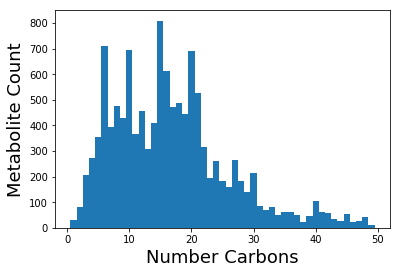

In [19]:
hist = plt.hist(df.NumC, np.arange(0.5,50.5))
plt.xlabel('Number Carbons', fontsize = 18)
plt.ylabel('Metabolite Count', fontsize = 18)

### Visualize 15-carbon compounds

In [20]:
Comp_15C = df[df.NumC == 15].Kegg_Smiles.values

In [ ]:
for compound in Comp_15C[:50]:
    vis = Chem.MolFromSmiles(compound)
    print compound
    display(vis)

### Cut off at certain number of carbons

In [21]:
cutoff = 7
df_cutoff = df[df.NumC <= cutoff]

### Run reduction function on the real / fake KEGG database

In [22]:
Kegg = df_cutoff['Kegg_Smiles'].values

#### Test with a fake KEGG database: 

In [23]:
#testing on cholesterol
Kegg = ['CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4C[C@@H](O)CC[C@]4(C)[C@H]3CC[C@]12C']



In [24]:
# Empty list of all reactions. 
rxn_list = []
Master_Sub_List = []
counter = 0
# for each KEGG metabolite
for metabolite in Kegg:
    # Run reduction function on a single metabolite
    rxn_list_temp, Master_Sub_List = reduce_metabolite(metabolite, Master_Sub_List)
    # print 'Current rxn_list_temp', rxn_list_temp
    
    # If there are some reactions, store in reaction list
    if len(rxn_list_temp) > 0:
        rxn_list += rxn_list_temp
        # Make Unique (necessary ?)
        rxn_list = list(set(rxn_list)) 
    # Update Master_Sub_List
    new_subs_list = [rxn.split('>>')[0] for rxn in rxn_list_temp]
    Master_Sub_List += new_subs_list
    Master_Sub_List = list(set(Master_Sub_List))
    # print 'Updated MasterSubList', Master_Sub_List, '\n'
    
    # Update counter variable and print every 100 steps. 
    counter += 1
    if counter%100 == 0:
        print counter

In [25]:
rxn_list.sort(key = len)
print len(rxn_list)

1


CC(C)CCC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4C[C@@H](O)CC[C@]4(C)[C@H]3CC[C@]12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CCCCC4(C)C3CCC12C


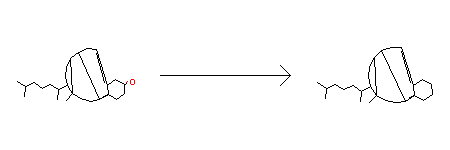

In [45]:
for rxn in rxn_list[:100]:
    print rxn
    display(AllChem.ReactionFromSmarts(str(rxn)))

### Oxidations

In [29]:
rxn_network_file = 'rxn_networks/cholesterol.txt'
rxn_limit = 100000

In [30]:
# Empty list of all reactions. 
rxn_list_ox = []
Master_Sub_List = []
counter = 0
# for each KEGG metabolite
for metabolite in Kegg:
    # Run reduction function on a single metabolite
    rxn_list_temp, Master_Sub_List = oxidize_metabolite(metabolite, Master_Sub_List, rxn_network_file, rxn_limit)
    # print 'Current rxn_list_temp', rxn_list_temp
    
    # If there are some reactions, store in reaction list
    if len(rxn_list_temp) > 0:
        rxn_list_ox += rxn_list_temp
        # Make Unique (necessary ?)
        rxn_list_ox = list(set(rxn_list_ox)) 
     # Update reaction file:
        update_rxn_file(rxn_network_file, rxn_list_ox)
    
    # Update Master_Sub_List
    new_subs_list = [rxn.split('>>')[0] for rxn in rxn_list_temp]
    Master_Sub_List += new_subs_list
    Master_Sub_List = list(set(Master_Sub_List))
    # print 'Updated MasterSubList', Master_Sub_List, '\n'
    
    # Update counter variable and print every 100 steps. 
    counter += 1
    if counter%100 == 0:
        print counter

number of reactions 16
number of reactions 2438
number of reactions 15164
number of reactions 73039


In [61]:
rxn_list_ox.sort(key = len)
print len(rxn_list_ox)

2438


CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO


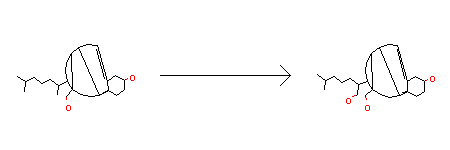

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO


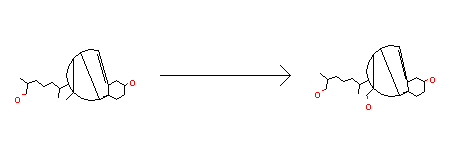

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C


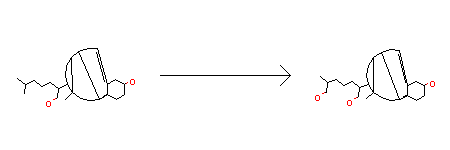

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CCCC(CO)CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C


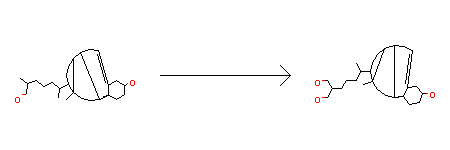

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C


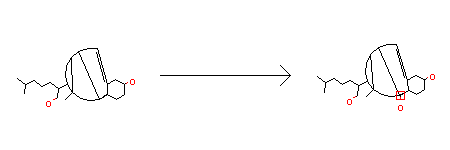

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12CO


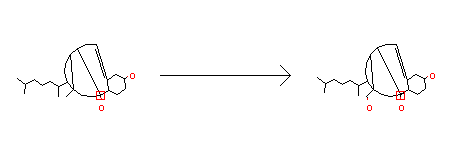

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C


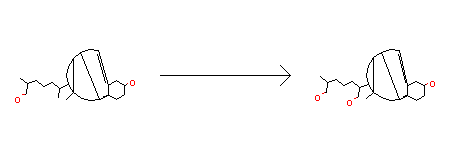

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C


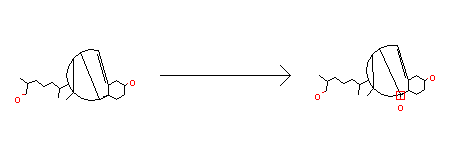

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C=O)C3CCC12C


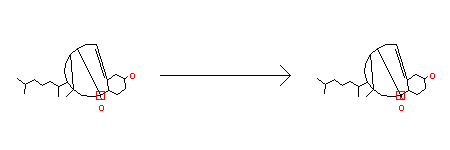

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(C=O)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C


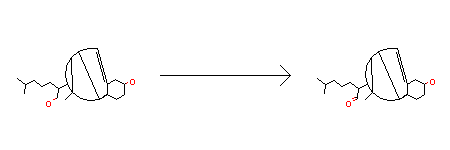

CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12CO


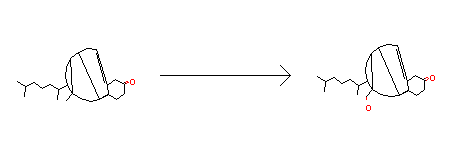

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C=O


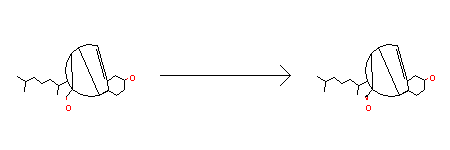

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C


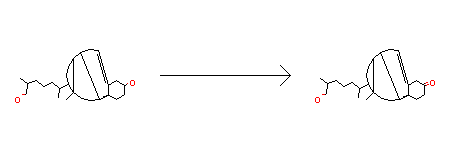

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C=O)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C


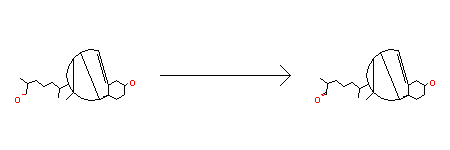

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO


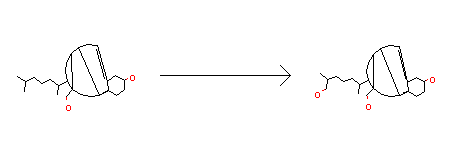

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C


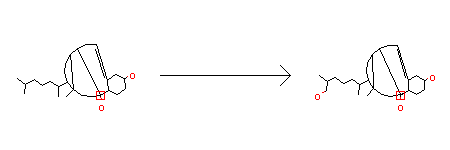

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(CO)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C


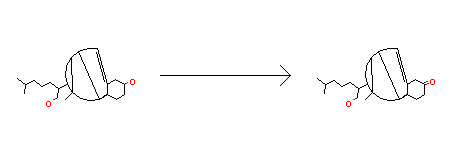

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C


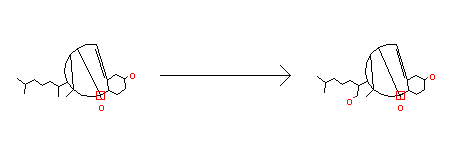

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12CO


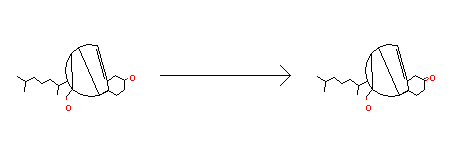

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO


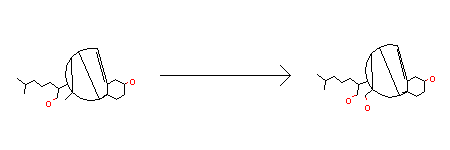

CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(CO)C3CCC12C


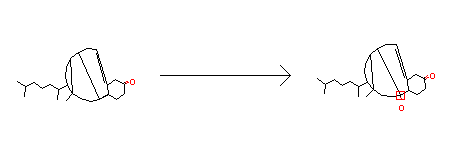

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12CO


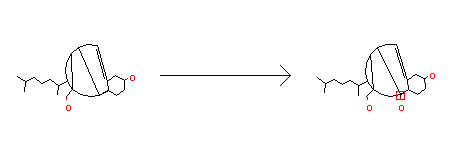

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(CO)C3CCC12C


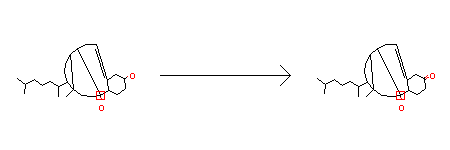

CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C>>CC(CO)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C


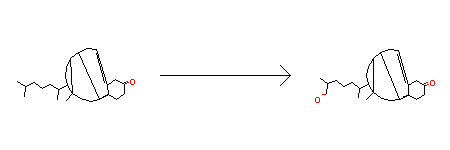

CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C>>CC(C)CCCC(CO)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C


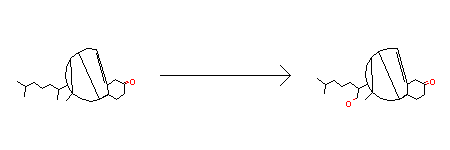

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(C)CCCC(C)C1CC(O)C2C3CC=C4CC(O)CCC4(CO)C3CCC12C


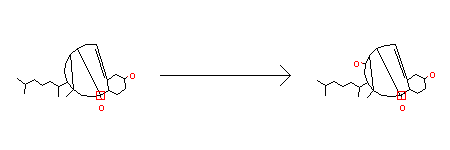

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CCCC(C)C1C(O)CC2C3CC=C4CC(O)CCC4(C)C3CCC21C


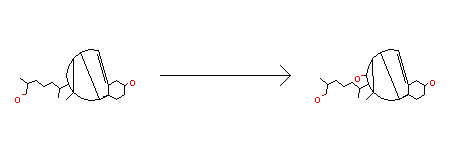

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(C)CC(O)CC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO


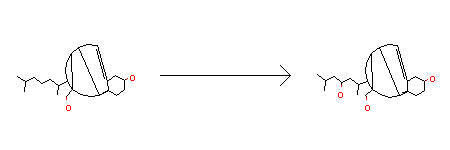

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CC(O)C12CO


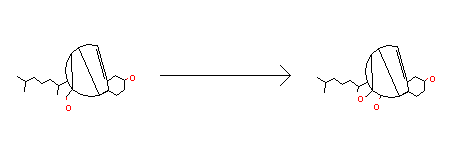

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CCCC(C)C1CCC2C3C(O)C=C4CC(O)CCC4(C)C3CCC12C


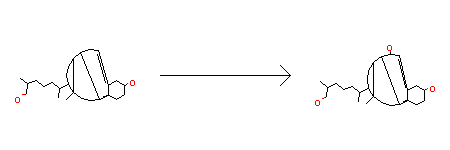

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(CO)C1CCC2C3C(O)C=C4CC(O)CCC4(C)C3CCC12C


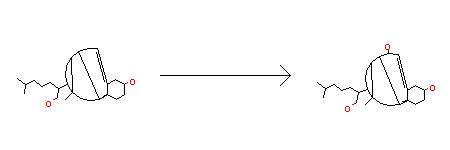

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CC(O)CC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C


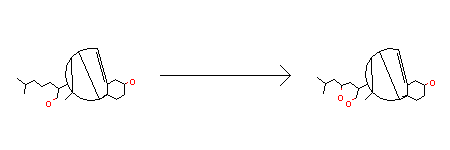

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CC(O)C12C


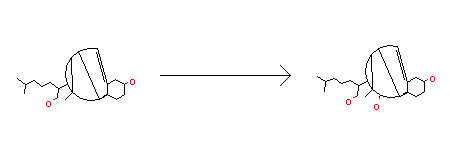

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(C)CCCC(C)C1CC(O)C2C3CC=C4CC(O)CCC4(C)C3CCC12CO


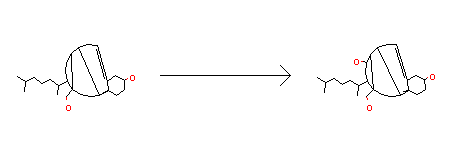

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CC(O)C12C


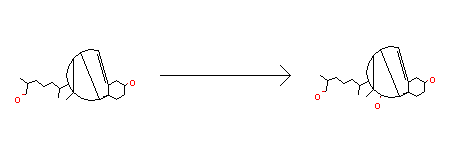

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CC(O)C4(C)C3CCC12CO


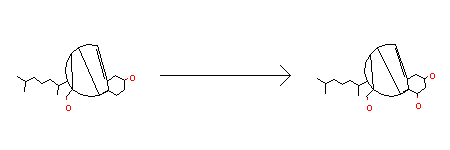

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(C)CCCC(C)C1C(O)CC2C3CC=C4CC(O)CCC4(C)C3CCC21CO


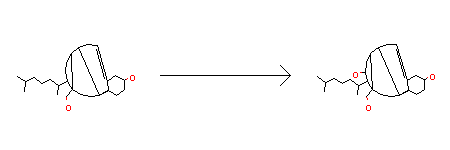

CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3C(O)CC12C


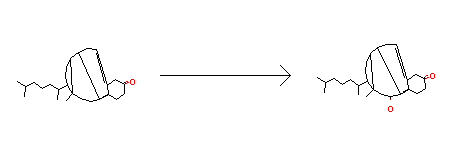

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4C(O)C(O)CCC4(CO)C3CCC12C


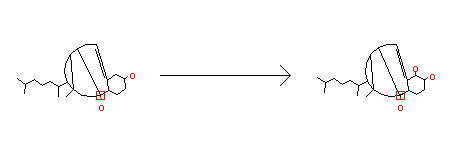

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(CO)C1CC(O)C2C3CC=C4CC(O)CCC4(C)C3CCC12C


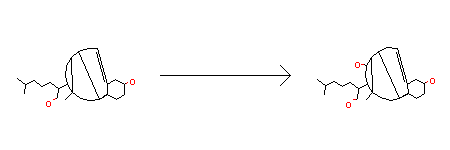

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(CO)C1CCC2C3CC=C4C(O)C(O)CCC4(C)C3CCC12C


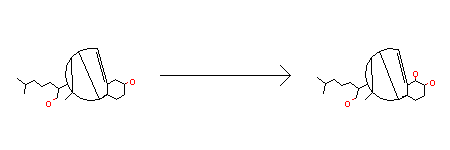

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CCCC(C)C1CC(O)C2C3CC=C4CC(O)CCC4(C)C3CCC12C


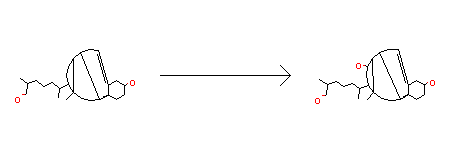

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)C(O)CC4(CO)C3CCC12C


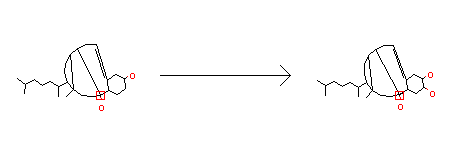

CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C>>CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C


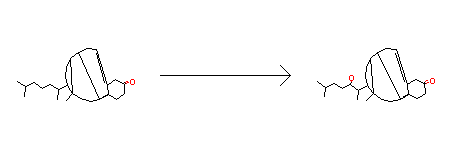

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)C(O)CC4(C)C3CCC12C


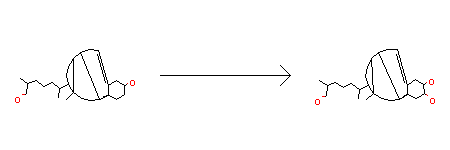

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)C(O)CC4(C)C3CCC12C


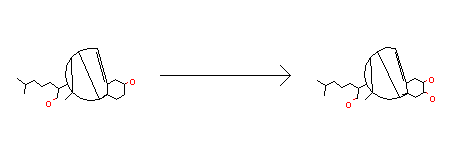

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO


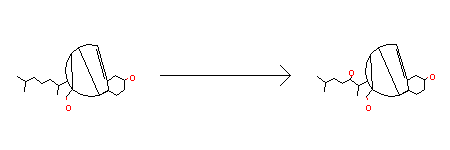

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CC(O)C4(C)C3CCC12C


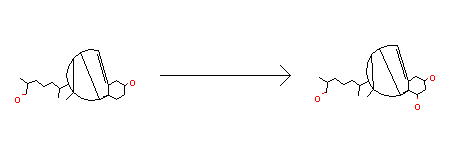

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3C(O)CC12C


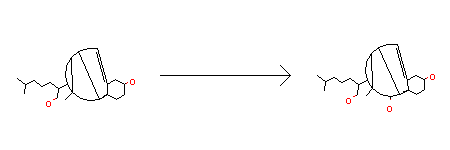

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3C(O)CC12C


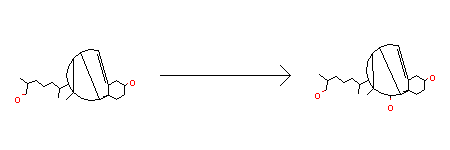

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CC(O)C4(C)C3CCC12C


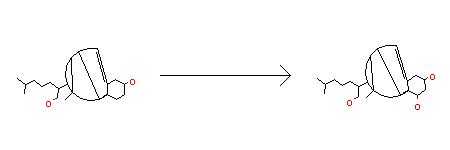

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C


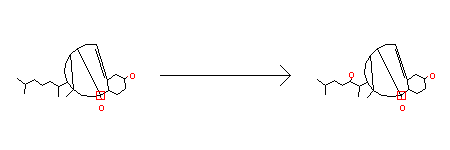

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CC(O)C4(CO)C3CCC12C


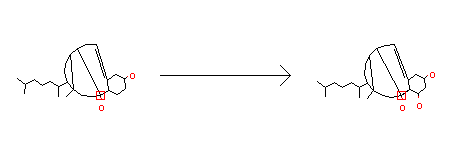

CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4C(O)C(=O)CCC4(C)C3CCC12C


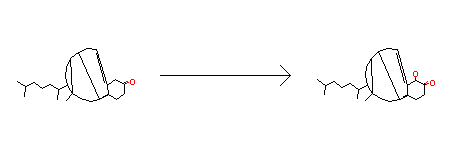

CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C>>CC(C)CCCC(C)C1CC(O)C2C3CC=C4CC(=O)CCC4(C)C3CCC12C


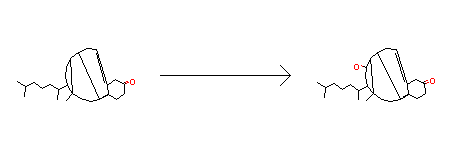

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C


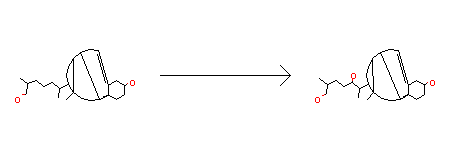

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3C(O)CC12C


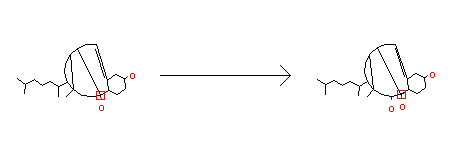

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(C)CCCC(C)C1CCC2C3CC=C4C(O)C(O)CCC4(C)C3CCC12CO


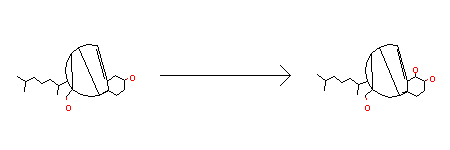

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(C)CCCC(C)C1C(O)CC2C3CC=C4CC(O)CCC4(CO)C3CCC21C


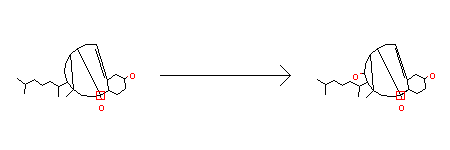

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CC(O)CC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C


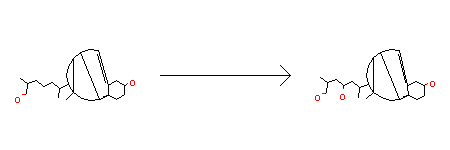

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCC(O)C(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C


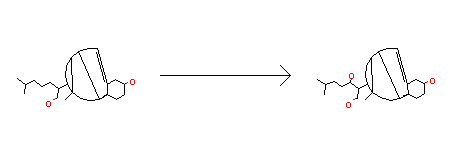

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CCCC(C)C1CCC2C3CC=C4C(O)C(O)CCC4(C)C3CCC12C


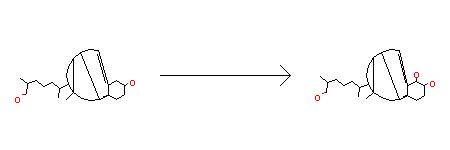

CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CC(O)C4(C)C3CCC12C


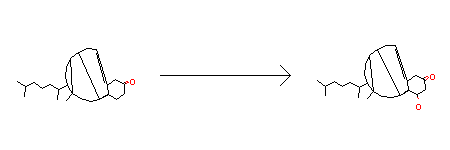

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(C)CCCC(C)C1CCC2C3C(O)C=C4CC(O)CCC4(C)C3CCC12CO


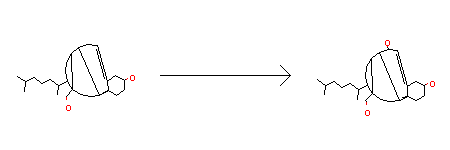

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3C(O)C=C4CC(O)CCC4(CO)C3CCC12C


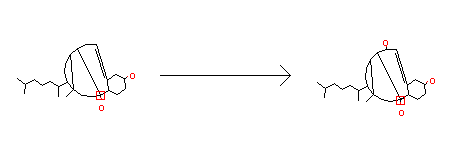

CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)C(O)CCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C


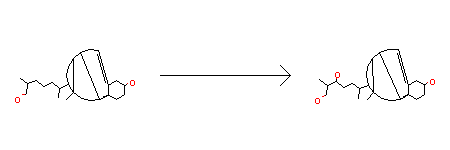

CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C>>CC(C)CC(O)CC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C


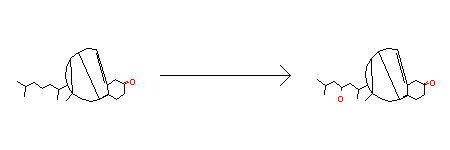

CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)C(O)CC4(C)C3CCC12C


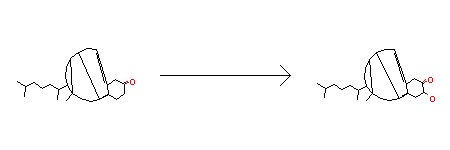

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)C(O)CC4(C)C3CCC12CO


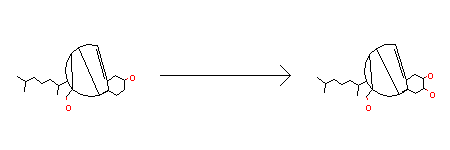

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CC(O)C12C


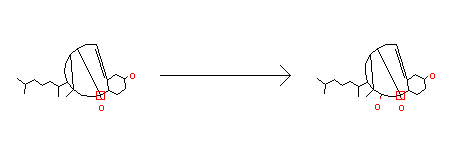

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(C)C(O)CCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO


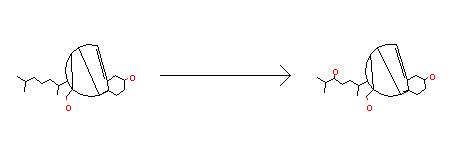

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(C)C(O)CCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C


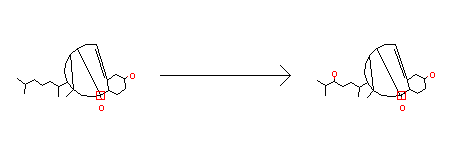

CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C>>CC(C)CCCC(C)C1C(O)CC2C3CC=C4CC(=O)CCC4(C)C3CCC21C


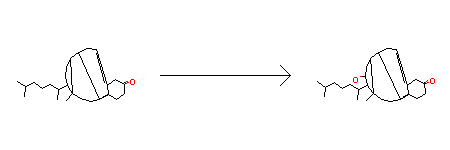

CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C>>CC(C)C(O)CCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C


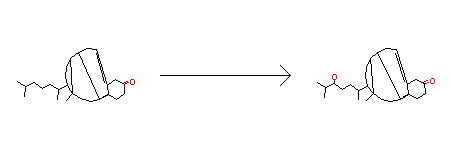

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)C(O)CCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C


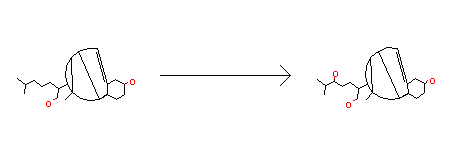

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C>>CC(C)CC(O)CC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C


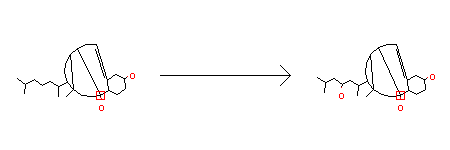

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12CO>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3C(O)CC12CO


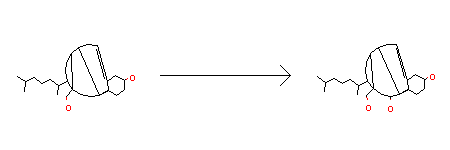

CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3C(O)C=C4CC(=O)CCC4(C)C3CCC12C


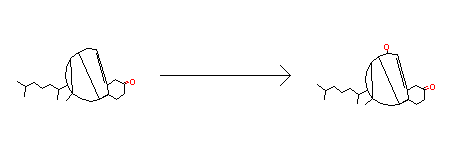

CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CC(O)C12C


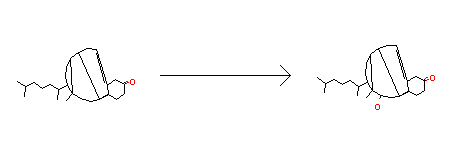

CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(CO)C1C(O)CC2C3CC=C4CC(O)CCC4(C)C3CCC21C


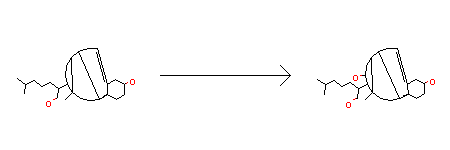

CC(C)CCCC(C)C1CC(O)C2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(C)C1CC(O)C2C3CC=C4CC(=O)CCC4(C)C3CCC12C


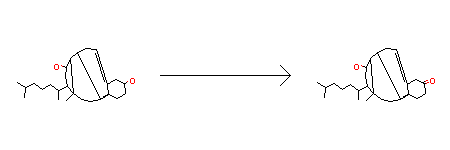

CC(C)CCCC(C)C1CCC2C3C(O)C=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3C(O)C=C4CC(=O)CCC4(C)C3CCC12C


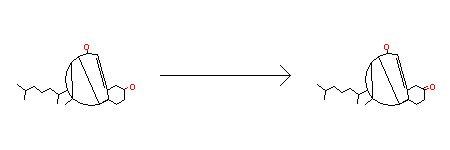

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CC(O)C4(C)C3CCC12C>>CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CC(O)C4(C)C3CCC12C


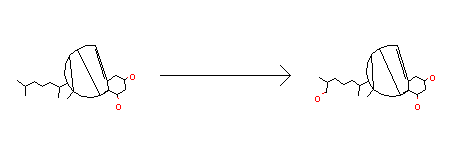

CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C


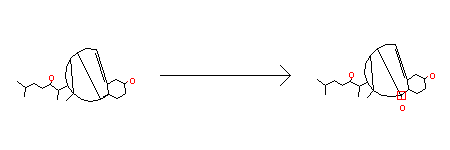

CC(C)CCCC(C)C1CC(O)C2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(CO)C1CC(O)C2C3CC=C4CC(O)CCC4(C)C3CCC12C


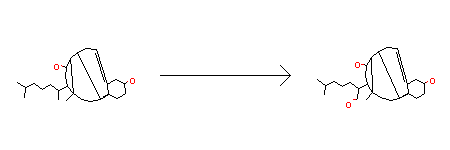

CC(C)CCCC(C)C1C(O)CC2C3CC=C4CC(O)CCC4(C)C3CCC21C>>CC(C)CCCC(C)C1C(O)CC2C3CC=C4CC(=O)CCC4(C)C3CCC21C


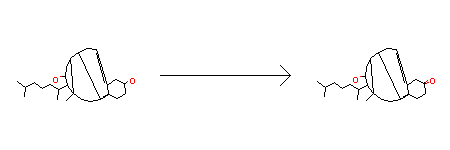

CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(CO)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C


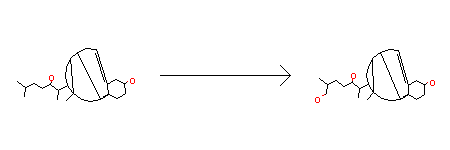

CC(C)C(O)CCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)C(O)CCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C


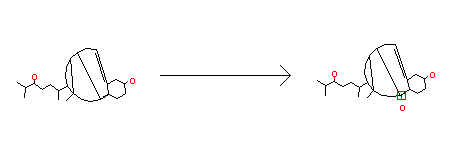

CC(C)CCCC(C)C1CCC2C3CC=C4C(O)C(O)CCC4(C)C3CCC12C>>CC(C)CCCC(C)C1CCC2C3CC=C4C(O)C(O)CCC4(CO)C3CCC12C


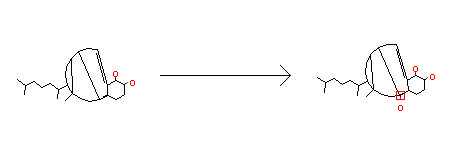

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CC(O)C12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CC(O)C12C


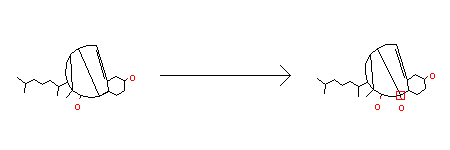

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CC(O)C12C>>CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CC(=O)C12C


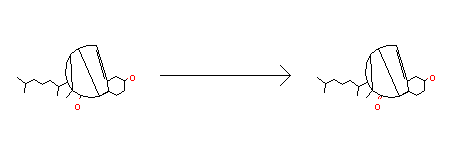

CC(C)CCCC(C)C1CCC2C3CC=C4C(O)C(O)CCC4(C)C3CCC12C>>CC(C)CCCC(CO)C1CCC2C3CC=C4C(O)C(O)CCC4(C)C3CCC12C


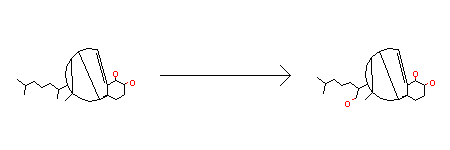

CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCC(O)C(C)C1CCC2C3CC=C4CC(=O)CCC4(C)C3CCC12C


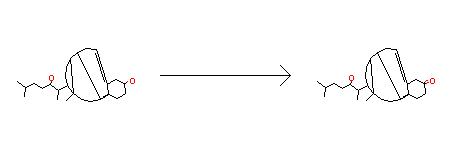

CC(C)CCCC(C)C1C(O)CC2C3CC=C4CC(O)CCC4(C)C3CCC21C>>CC(CO)CCCC(C)C1C(O)CC2C3CC=C4CC(O)CCC4(C)C3CCC21C


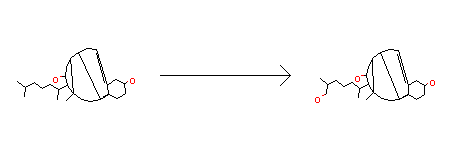

CC(C)CCCC(C)C1C(O)CC2C3CC=C4CC(O)CCC4(C)C3CCC21C>>CC(C)CCCC(C)C1C(O)CC2C3CC=C4CC(O)CCC4(C)C3CCC21CO


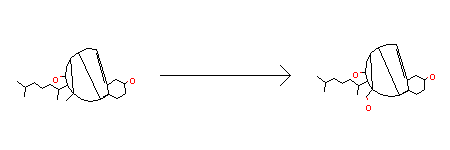

CC(C)CCCC(C)C1CC(O)C2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CCCC(C)C1CC(O)C2C3CC=C4CC(O)CCC4(CO)C3CCC12C


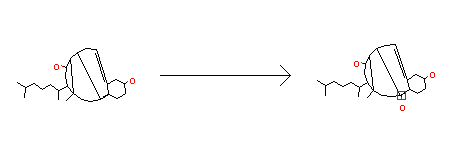

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)C(O)CC4(C)C3CCC12C>>CC(C)CCCC(CO)C1CCC2C3CC=C4CC(O)C(O)CC4(C)C3CCC12C


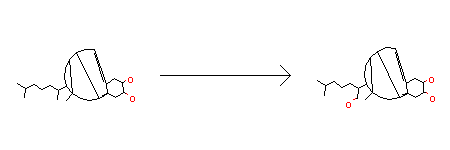

CC(C)CC(O)CC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CC(O)CC(C)C1CCC2C3CC=C4CC(O)CCC4(CO)C3CCC12C


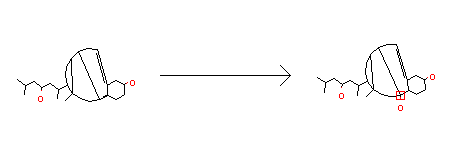

CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CC(O)C12C>>CC(CO)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CC(O)C12C


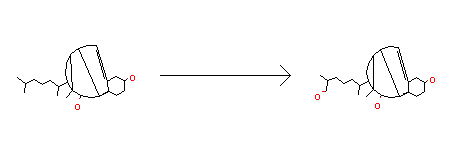

CC(C)CC(O)CC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C>>CC(C)CC(O)CC(CO)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C


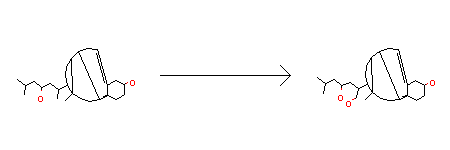

In [55]:
for rxn in rxn_list_ox[:100]:
    print rxn
    display(AllChem.ReactionFromSmarts(str(rxn)))

# Ignore this for now

In [25]:
df = pd.read_csv("~/Dropbox/Quantum/redox/data_for_Ben/All_Redox_Reactions.csv")

In [39]:
sub_df = df[100:200]
sub_df.head()

,Reaction
100,O=CC=CCO>>OCC=CCO
101,CCCC(=O)O>>CCCC=O
102,OCCC(O)CO>>OCCCCO
103,CC(N)CCO>>CCC(C)N
104,OCC=CCCO>>CCC=CCO


In [74]:
sub_df['Category'] = sub_df.apply(categorize_rxn, 1)

In [75]:
sub_df

,Reaction,Category
100,O=CC=CCO>>OCC=CCO,G2
101,CCCC(=O)O>>CCCC=O,G1
102,OCCC(O)CO>>OCCCCO,G4
103,CC(N)CCO>>CCC(C)N,G4
104,OCC=CCCO>>CCC=CCO,G4
105,NCC(N)CO>>CC(N)CN,G4
106,O=C(O)CCl>>O=CCCl,G1
107,CNC(C)CO>>CNC(C)C,G4
108,O=CC(O)CS>>O=CCCS,G4
109,C[C@H](O)CO>>CCCO,G4


In [46]:
rxn_list = list(df['Reaction'].values)

In [78]:
rxn = rxn_list[100000]
print rxn

CC(CCCC(C)(O)CO)C1CCC2C3CC=C4CC(CCC4(C)C3CCC12C)OC1CC(O)C(O)C(C)O1>>CC(O)C(O)C(O)CCO


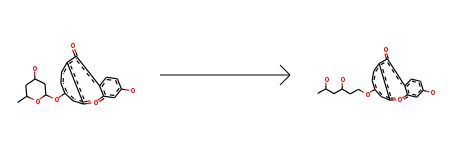

In [77]:
display(AllChem.ReactionFromSmarts(rxn))

CCO>>CC


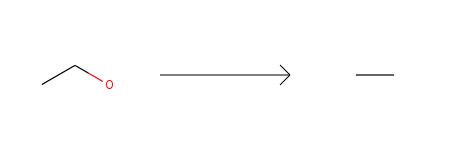

OCCO>>CCO


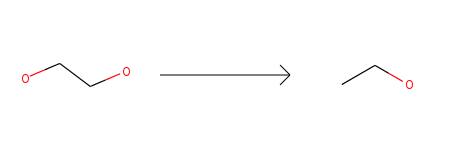

CCCO>>CCC


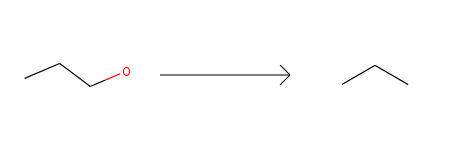

O=CO>>C=O


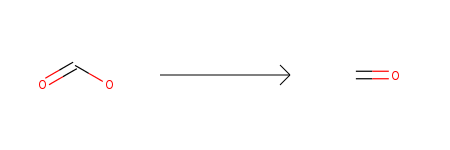

OCCF>>CCF


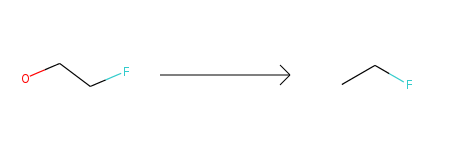

OCCS>>CCS


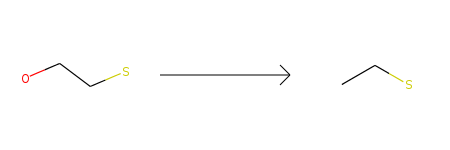

CC=O>>CCO


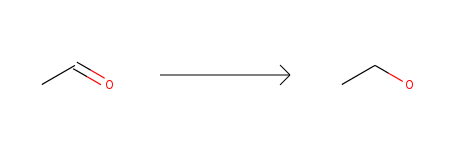

NCCO>>CCN


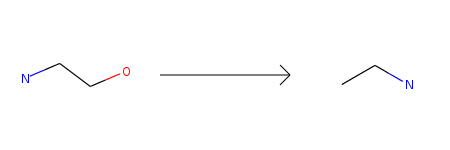

CSCCO>>CCSC


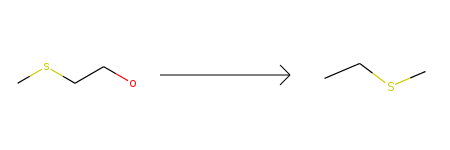

O=CCS>>OCCS


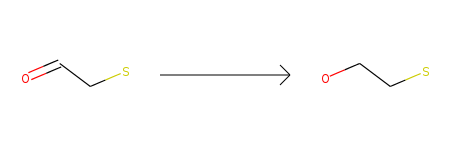

CNCCO>>CCNC


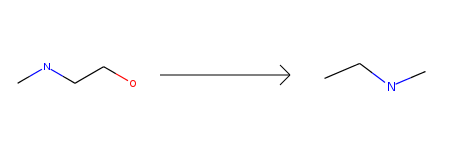

OCCCl>>CCCl


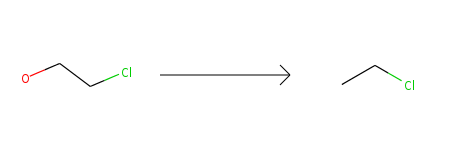

OCCCS>>CCCS


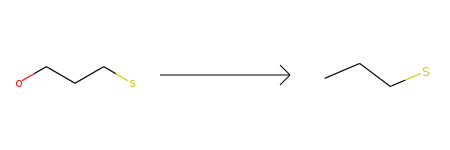

O=CCF>>OCCF


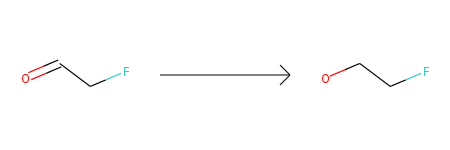

C=CCO>>C=CC


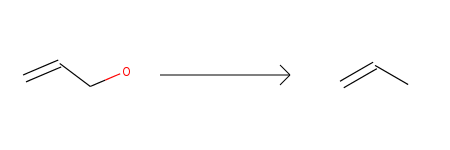

NCC=O>>NCCO


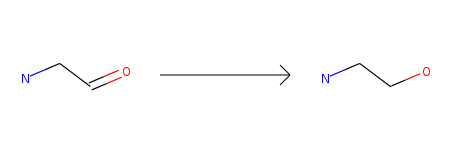

OCCCO>>CCCO


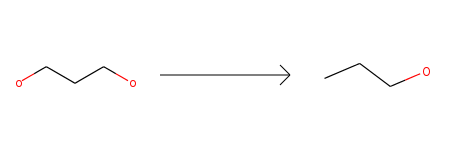

O=CCO>>CC=O


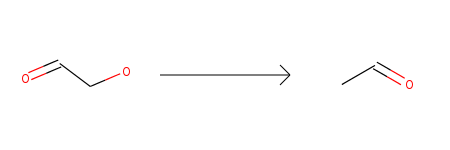

[*]CO>>[*]C


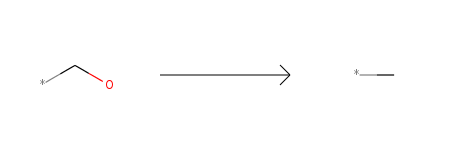

CCCCO>>CCCC


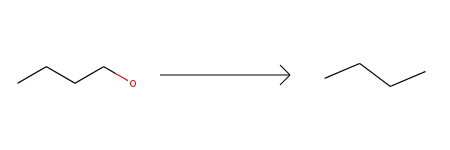

OCCBr>>CCBr


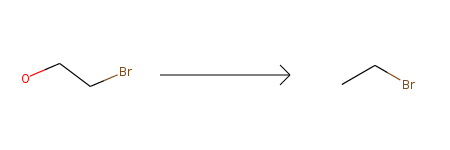

NCCCO>>CCCN


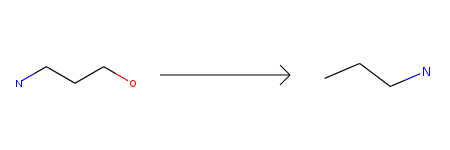

O=CCO>>OCCO


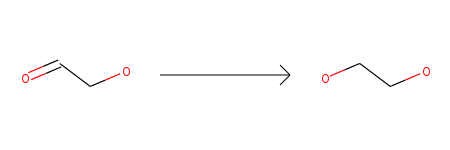

C#CCO>>C#CC


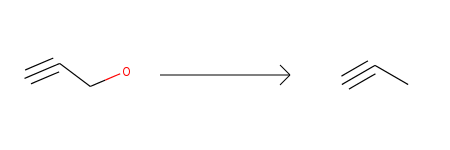

CCC=O>>CCCO


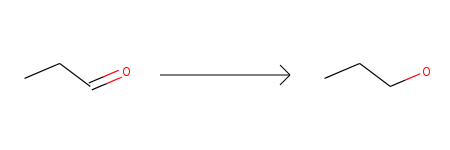

CC(C)O>>CCC


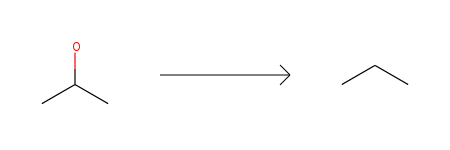

N=CCO>>CC=N


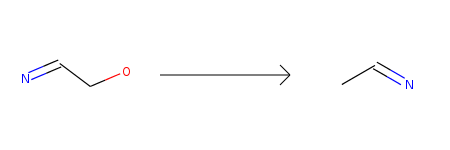

O=CCCO>>CCC=O


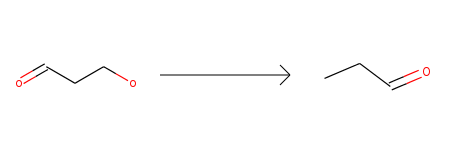

CC(O)CN>>CCCN


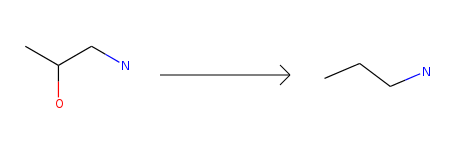

C#CC=O>>C#CCO


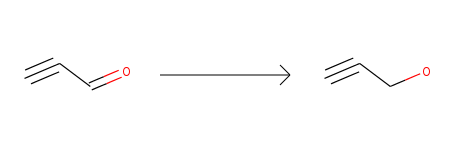

C=CC=O>>C=CCO


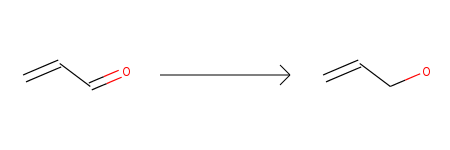

CSCC=O>>CSCCO


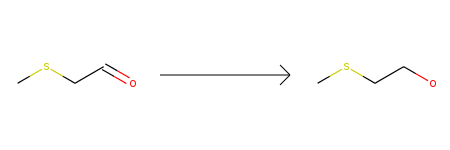

CCNCCO>>CCNCC


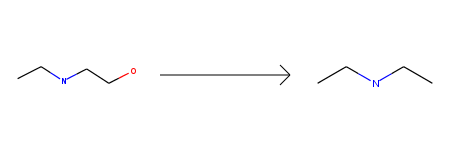

O=CCCO>>OCCCO


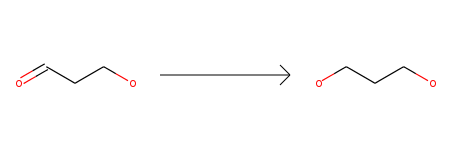

CC#CCO>>CC#CC


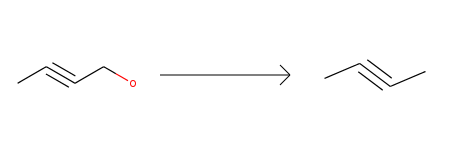

NC(=O)O>>NC=O


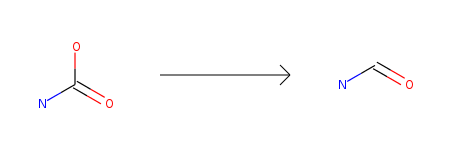

O=CCCS>>OCCCS


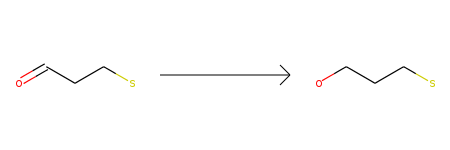

CCCC=O>>CCCCO


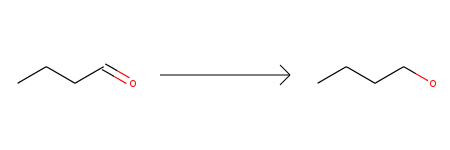

OCCCCO>>CCCCO


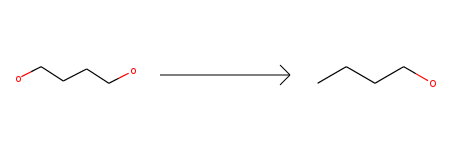

CCC(C)O>>CCCC


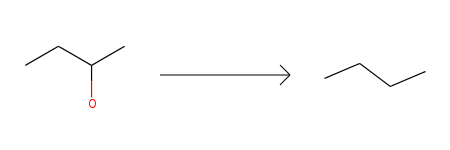

C#CCCO>>C#CCC


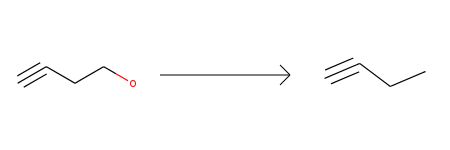

OCCCCl>>CCCCl


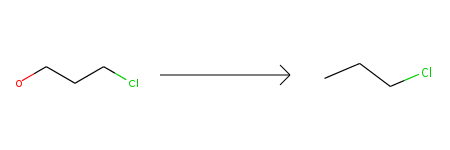

CCOCCO>>CCOCC


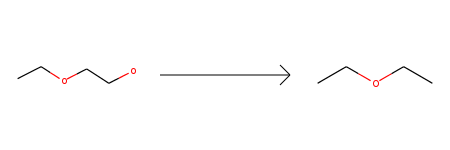

CNCC=O>>CNCCO


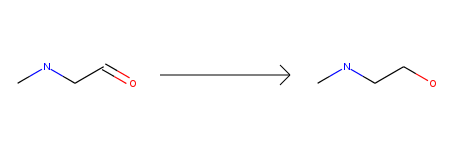

CC(=O)O>>CC=O


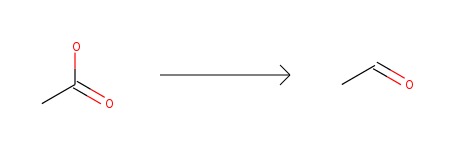

OC=CCO>>CC=CO


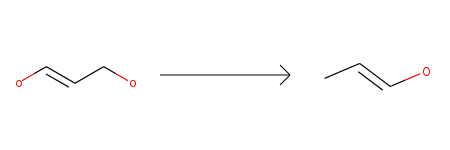

O=CCCl>>OCCCl


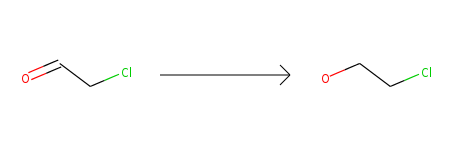

CSCCCO>>CCCSC


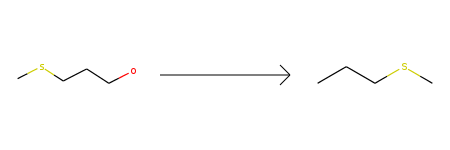

CCCCCO>>CCCCC


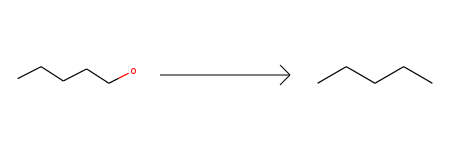

N=CC=O>>N=CCO


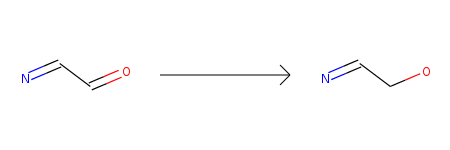

O=CC=O>>O=CCO


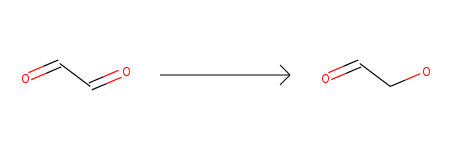

CCSCCO>>CCSCC


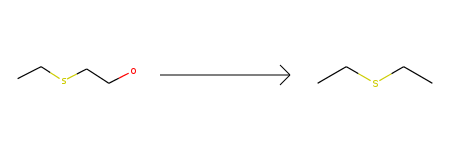

CC=CCO>>CC=CC


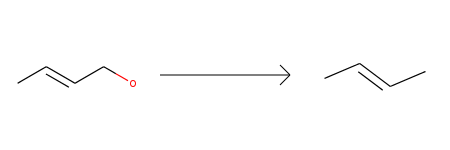

O=CCBr>>OCCBr


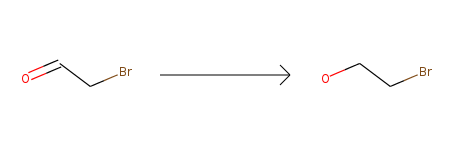

CC(O)CO>>CCCO


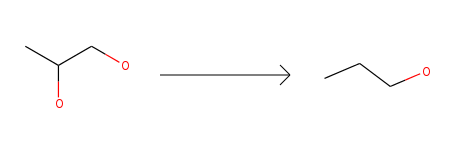

NCCC=O>>NCCCO


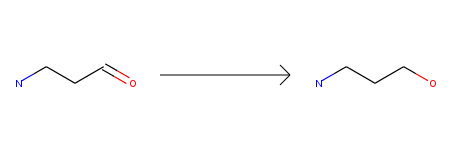

NCCCCO>>CCCCN


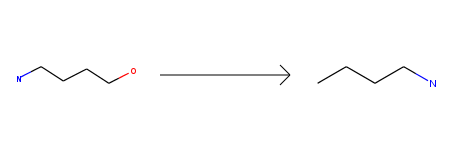

O=CCCCO>>CCCC=O


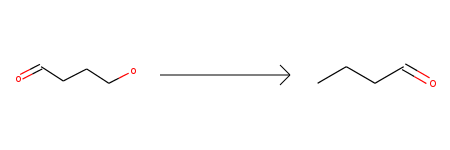

O=C(O)CO>>O=CCO


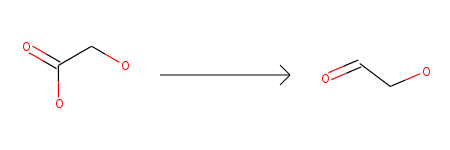

CC#CC=O>>CC#CCO


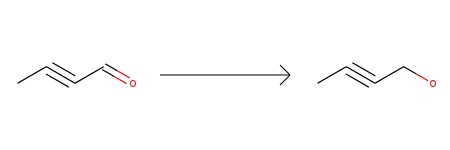

NCCCC=O>>NCCCCO


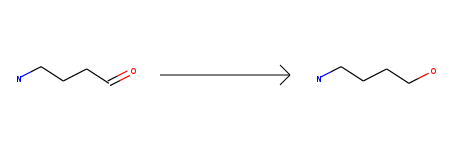

CC(O)CCO>>CCCCO


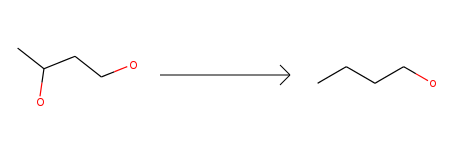

CC(O)CO>>CC(C)O


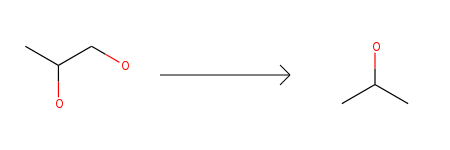

CSCCC=O>>CSCCCO


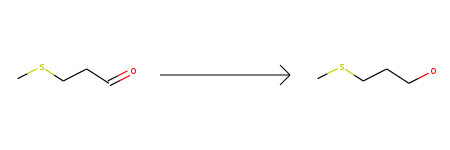

CC=CC=O>>CC=CCO


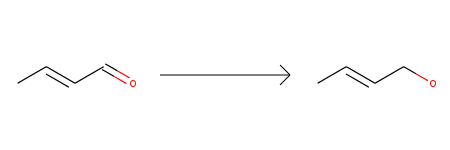

C#CCC=O>>C#CCCO


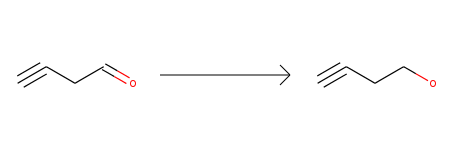

CNCCCCO>>CCCCNC


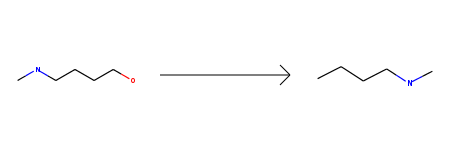

CSCCCCO>>CCCCSC


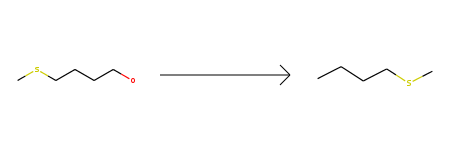

O=CCC=O>>O=CCCO


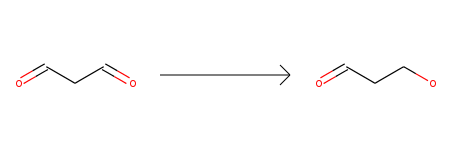

CCC(O)CC>>CCCCC


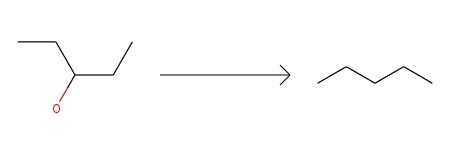

CCSCC=O>>CCSCCO


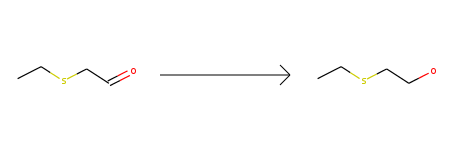

OCC=CCl>>CC=CCl


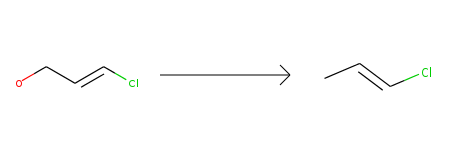

CCCCC=O>>CCCCCO


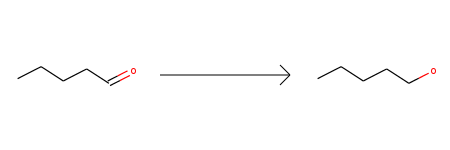

OCC1CC1>>CC1CC1


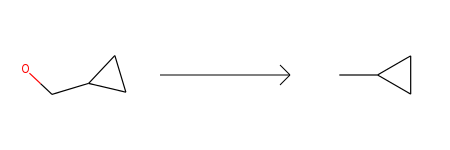

OCCOCCO>>CCOCCO


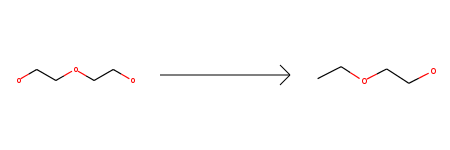

CCC(O)CO>>CCCCO


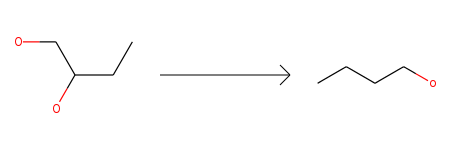

OCC#CCO>>CC#CCO


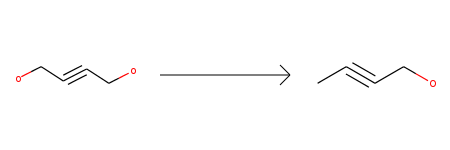

NCCCCCO>>CCCCCN


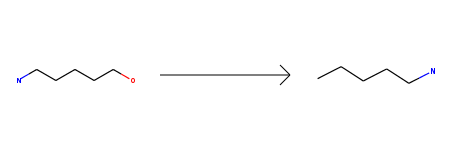

OCCCCCO>>CCCCCO


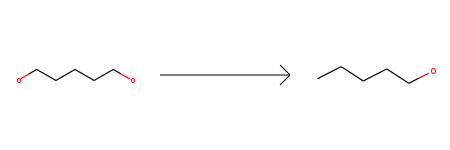

OCC(O)CO>>OCCCO


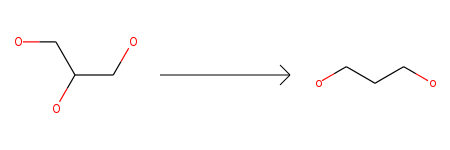

O=C(O)CS>>O=CCS


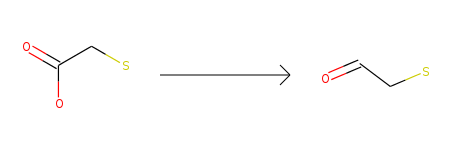

CCC(=O)O>>CCC=O


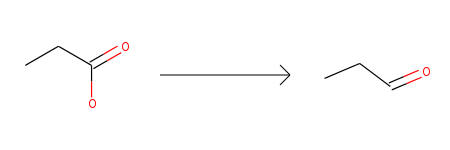

O=CC=CO>>OC=CCO


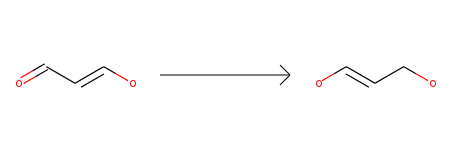

N=CNCCO>>CCNC=N


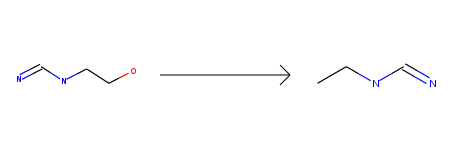

CC(O)CCl>>CCCCl


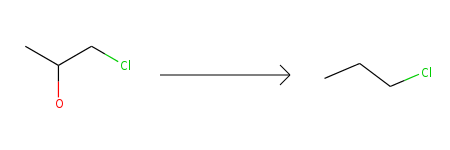

CCNCC=O>>CCNCCO


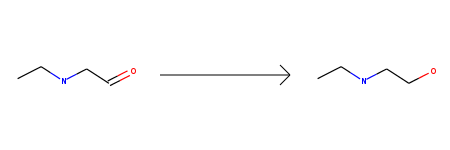

NCC(=O)O>>NCC=O


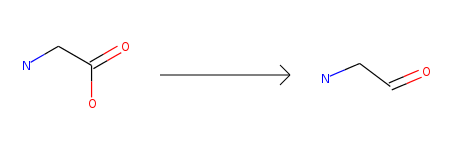

CCC=CCO>>CC=CCC


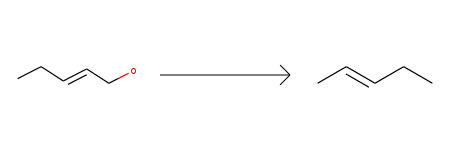

OCCNCCO>>CCNCCO


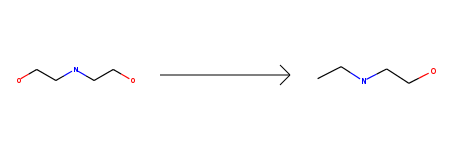

O=CCCCO>>OCCCCO


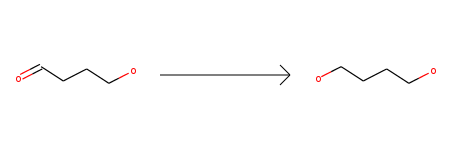

O=C(O)CF>>O=CCF


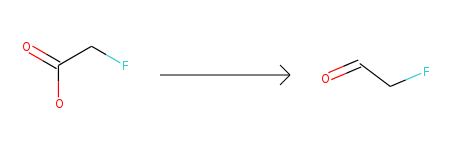

OCC1CO1>>CC1CO1


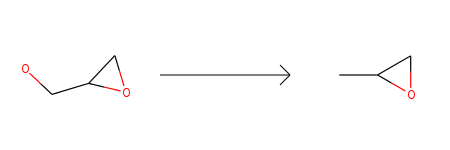

CC(C)CO>>CC(C)C


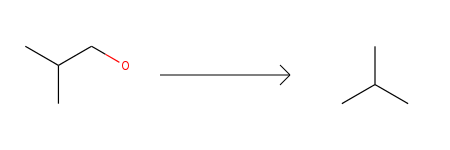

CC=CCCO>>CC=CCC


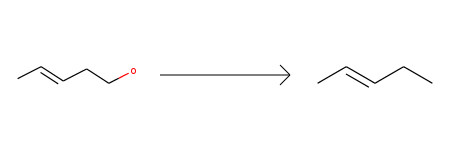

CCCCCCO>>CCCCCC


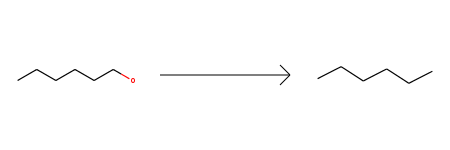

CC(N)CO>>CC(C)N


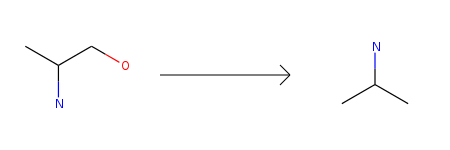

CC(C)=O>>CC(C)O


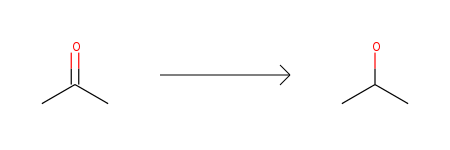

CCCC(C)O>>CCCCC


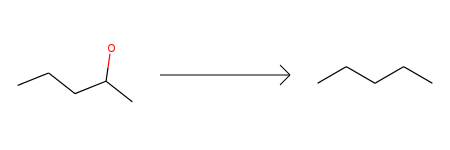

CC(O)C=O>>CCC=O


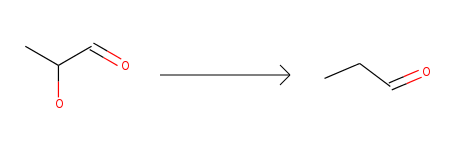

CCC(O)CCO>>CCCCCO


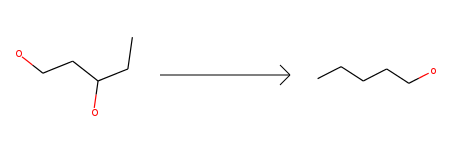

O=CC=CCO>>OCC=CCO


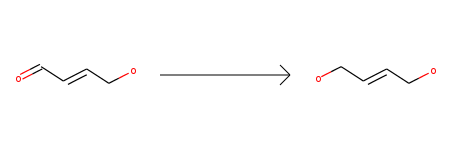

CCCC(=O)O>>CCCC=O


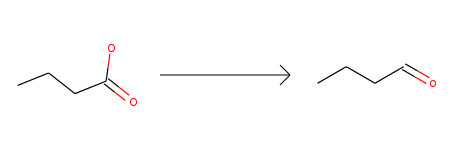

OCCC(O)CO>>OCCCCO


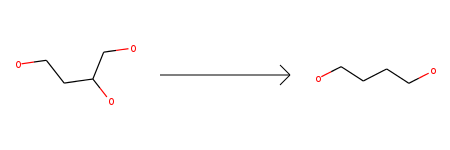

CC(N)CCO>>CCC(C)N


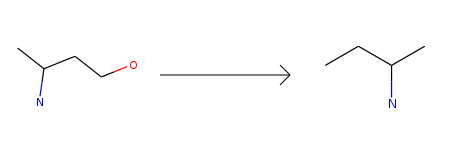

OCC=CCCO>>CCC=CCO


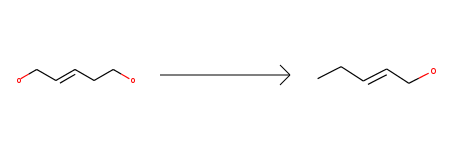

NCC(N)CO>>CC(N)CN


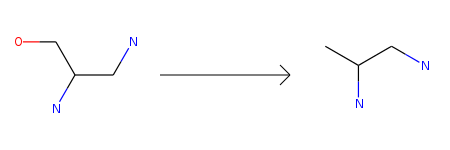

O=C(O)CCl>>O=CCCl


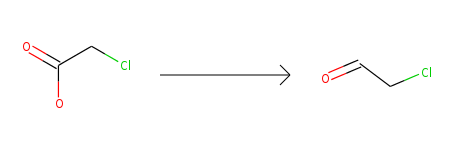

CNC(C)CO>>CNC(C)C


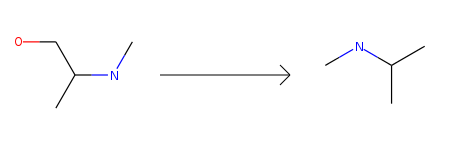

O=CC(O)CS>>O=CCCS


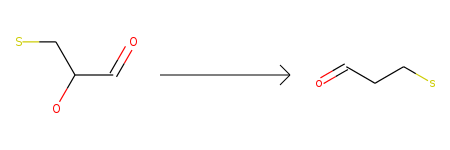

C[C@H](O)CO>>CCCO


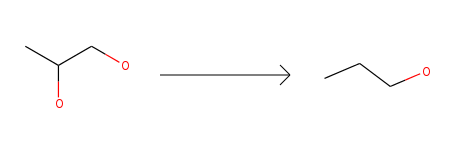

CC(CO)CO>>CC(C)CO


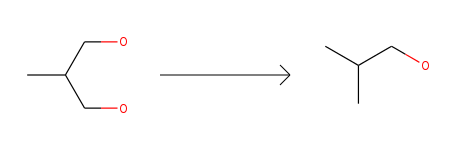

CC=CCCCO>>CC=CCCC


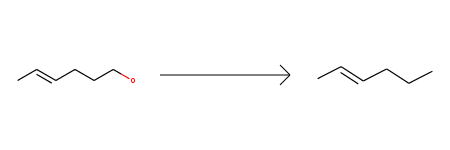

O=CCSCCO>>OCCSCCO


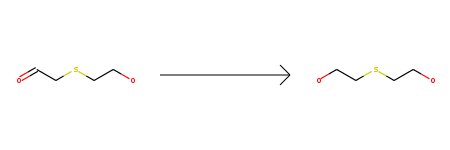

CCCC(O)CO>>CCCCCO


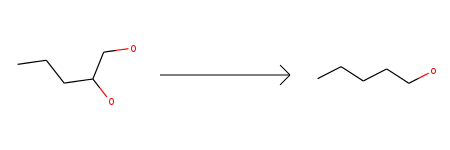

NC(=O)CO>>CC(N)=O


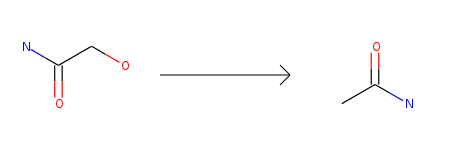

O=CCCCCO>>OCCCCCO


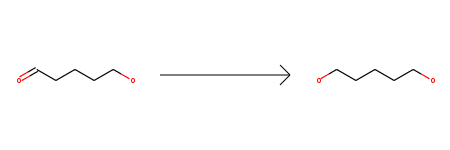

OC/C=C/Cl>>CC=CCl


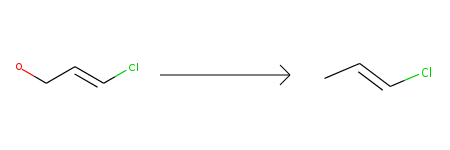

CN(C)CCO>>CCN(C)C


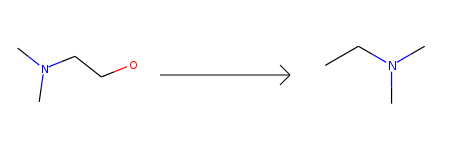

CC(O)CCCO>>CCCCCO


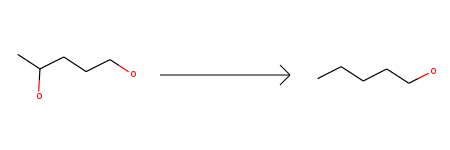

NC(CO)CF>>CC(N)CF


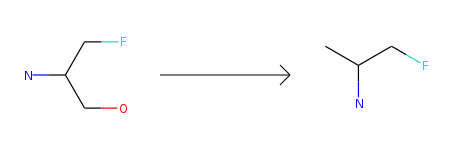

CC(N)C=O>>CC(N)CO


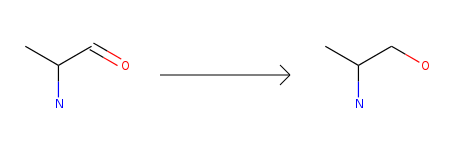

CC(O)CCO>>CCC(C)O


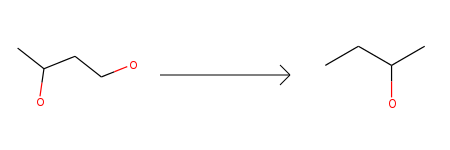

O=CCCC=O>>O=CCCCO


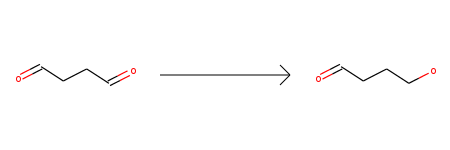

C#CC(=O)O>>C#CC=O


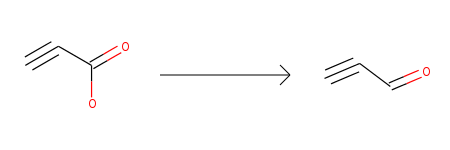

N=CNCC=O>>N=CNCCO


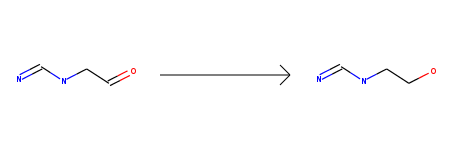

N=CC(=O)O>>N=CC=O


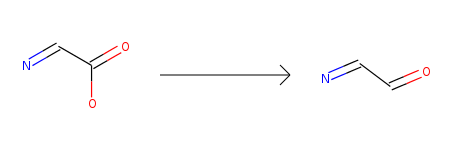

O=CCSCCO>>CCSCC=O


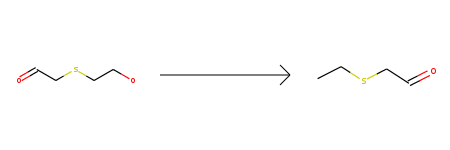

CSCCCC=O>>CSCCCCO


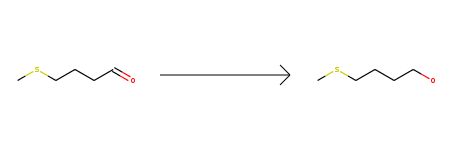

CCC(C)CO>>CCC(C)C


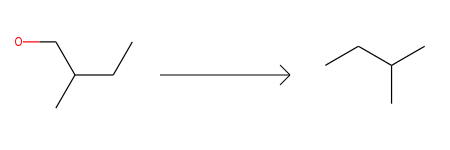

CSCC(=O)O>>CSCC=O


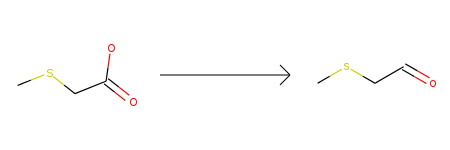

CCCC(O)CC>>CCCCCC


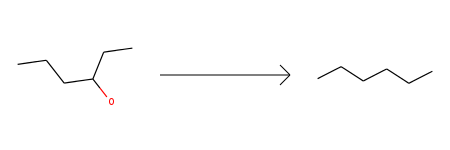

C=C(N)CO>>C=C(C)N


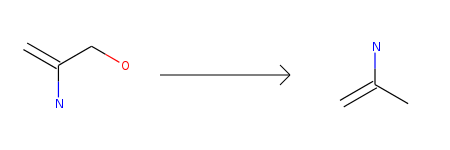

NCCCCC=O>>NCCCCCO


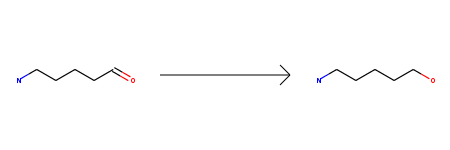

CC(O)CC=O>>CCCC=O


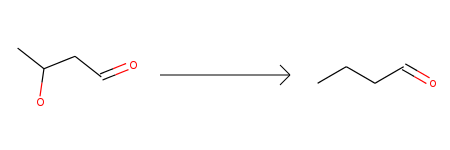

C=CC(=O)O>>C=CC=O


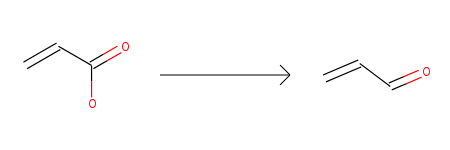

OC1CCCC1>>C1CCCC1


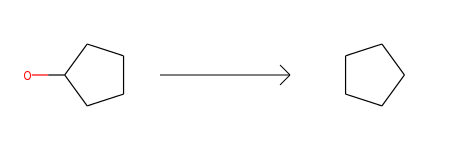

OCC(O)CO>>CC(O)CO


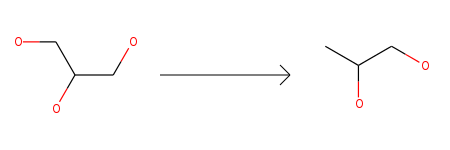

CCC(N)CO>>CCC(C)N


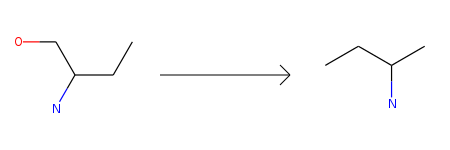

CCCCCC=O>>CCCCCCO


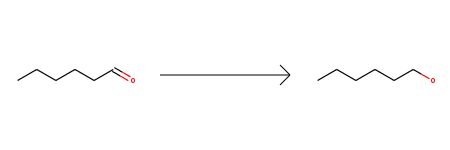

NCC(F)CO>>CC(F)CN


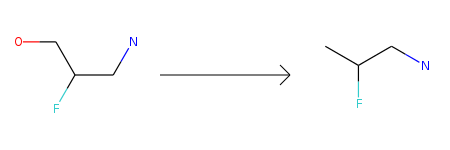

C/C=C/C=O>>CC=CCO


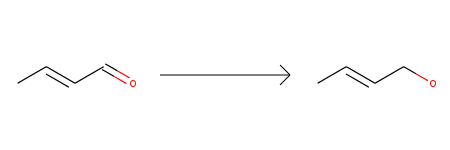

CC(=O)CN>>CC(O)CN


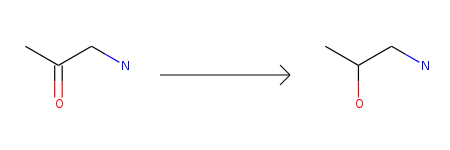

O=C(O)CCS>>O=CCCS


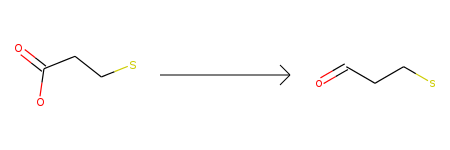

CC1OC1CO>>CC1OC1C


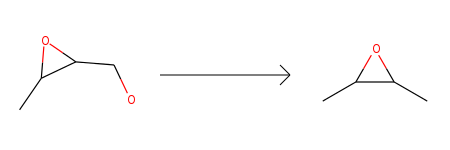

O=CC=CCl>>OCC=CCl


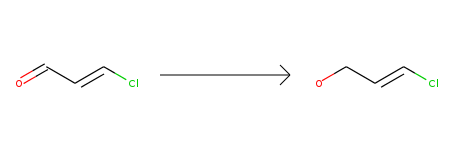

OCC1CCN1>>CC1CCN1


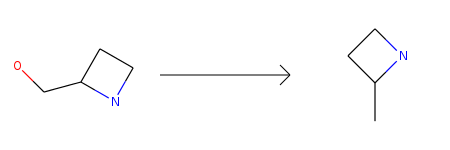

O=C(O)CCO>>O=CCCO


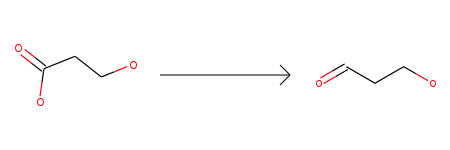

OCC(O)CCl>>OCCCCl


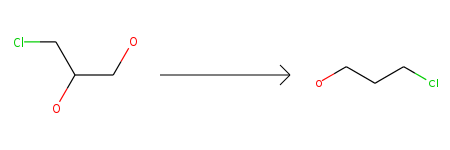

NCCCCCCO>>CCCCCCN


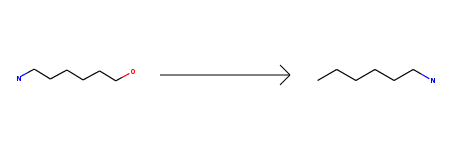

CC(CN)CO>>CC(C)CN


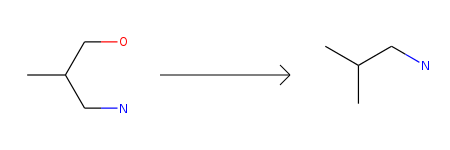

CCC(O)CO>>CCC(C)O


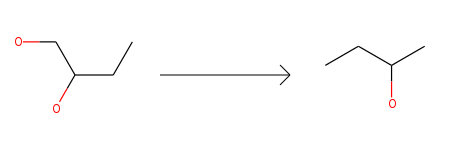

CC(O)CCCN>>CCCCCN


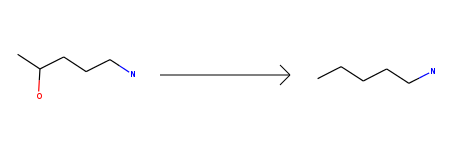

CCC=CC=O>>CCC=CCO


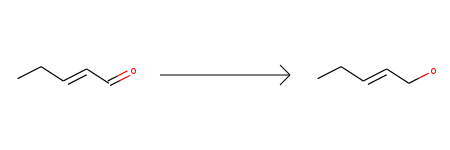

CCCCC(C)O>>CCCCCC


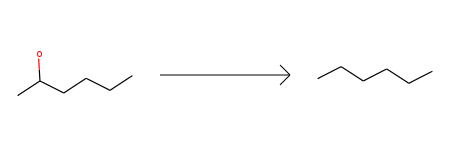

CC(O)C=O>>CC(O)CO


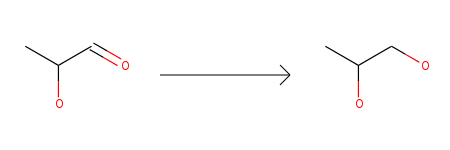

O=CC=CCO>>CC=CC=O


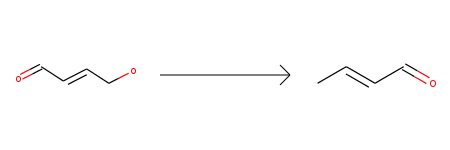

NC(CO)CS>>CC(N)CS


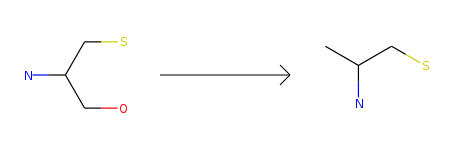

CNCC(=O)O>>CNCC=O


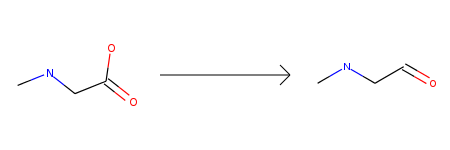

CCCCCCCO>>CCCCCCC


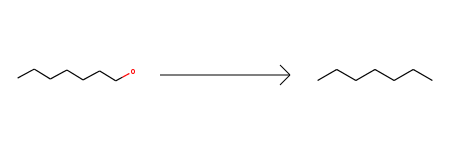

O=CC(O)CO>>O=CCCO


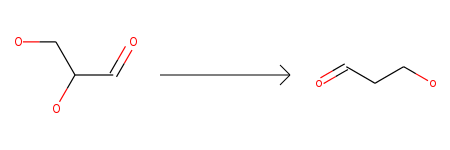

NCCC(=O)O>>NCCC=O


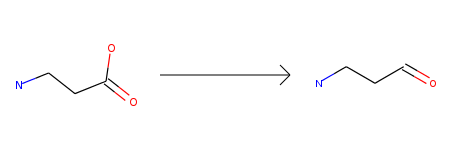

CNCCCC=O>>CNCCCCO


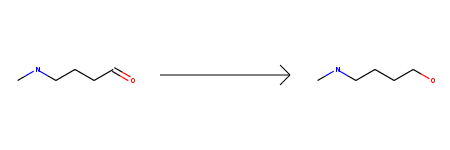

CC(=O)CO>>CC(C)=O


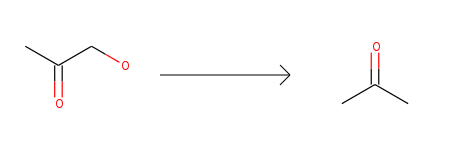

O=CCCCCO>>CCCCC=O


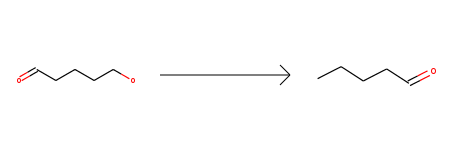

CCC(O)C=O>>CCCC=O


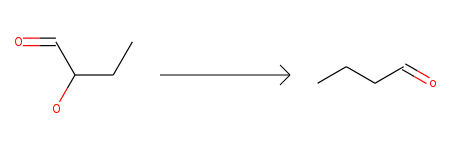

CCC(C)=O>>CCC(C)O


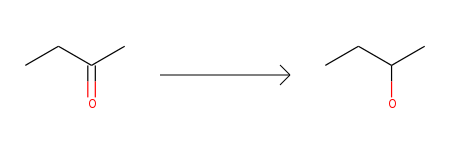

OCCCCCCO>>CCCCCCO


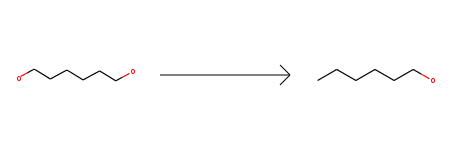

OCC=CCCO>>CC=CCCO


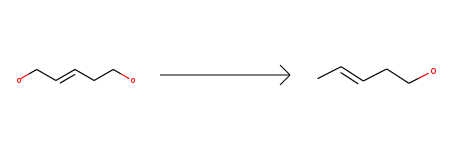

O=C(O)CO>>CC(=O)O


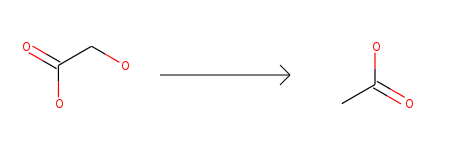

O=CC#CCO>>CC#CC=O


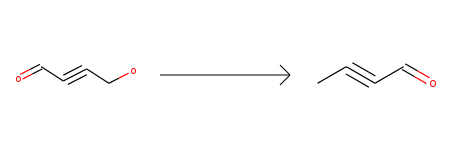

CCCC=CCO>>CC=CCCC


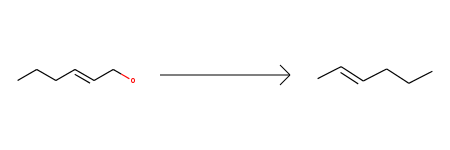

CC(C)CCO>>CCC(C)C


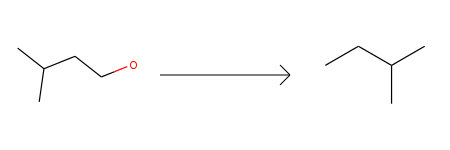

OC(CS)CCS>>SCCCCS


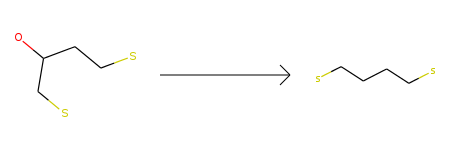

CCCC(O)CN>>CCCCCN


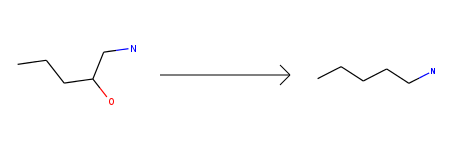

CCCCOCCO>>CCCCOCC


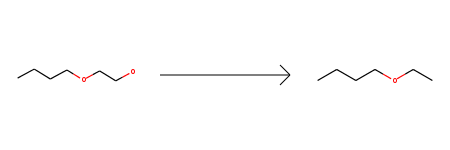

CSCCCCCO>>CCCCCSC


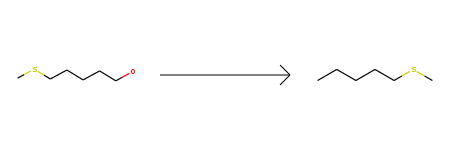

OCCN1CC1>>CCN1CC1


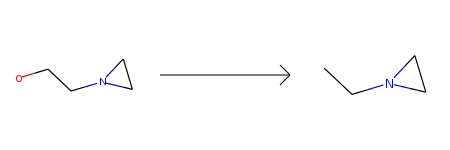

O=CC(=O)O>>O=CC=O


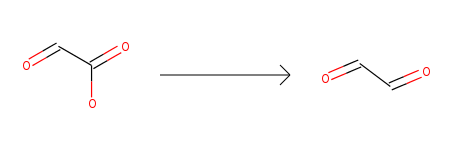

O=CC1CC1>>OCC1CC1


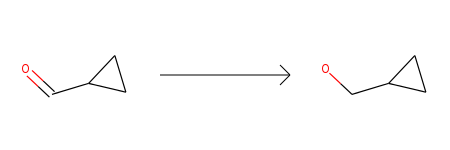

O=CC1CO1>>OCC1CO1


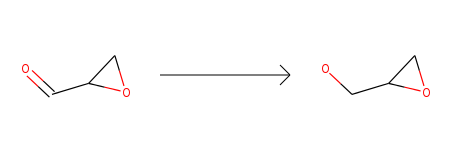

O=CC#CCO>>OCC#CCO


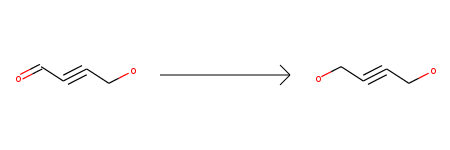

CSCCC(C)O>>CCCCSC


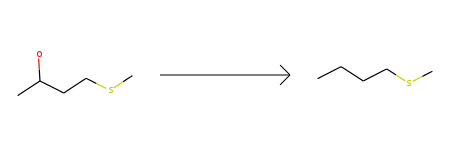

OCC(S)CS>>CC(S)CS


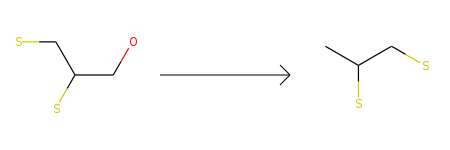

OC/C=C\Cl>>CC=CCl


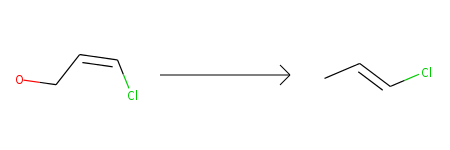

CC(=O)CO>>CC(O)CO


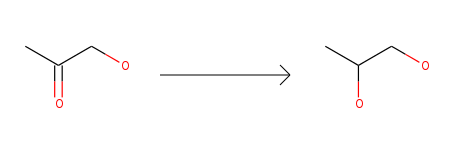

CC(C)C=O>>CC(C)CO


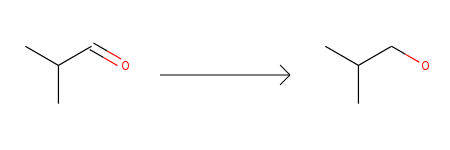

CCC=CCCO>>CCC=CCC


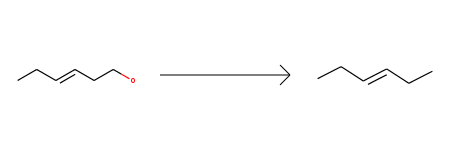

C[C@@H](O)CO>>CCCO


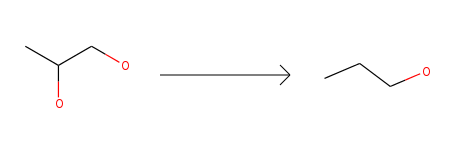

OC1CCCCO1>>OCCCCCO


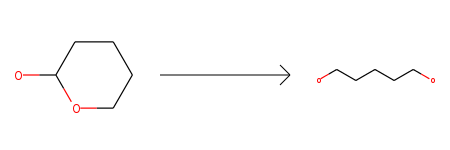

CCC1CCCO1>>CCCCCCO


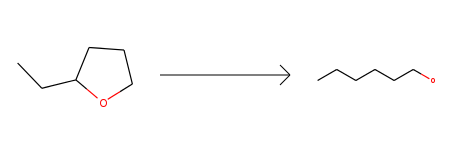

C[C@@H](O)CN>>CCCN


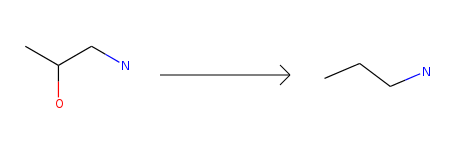

O=CCCCCCO>>CCCCCC=O


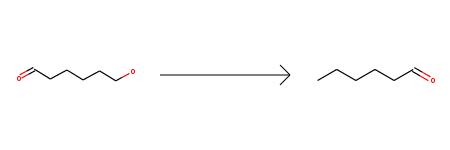

OCC1CCCS1>>CC1CCCS1


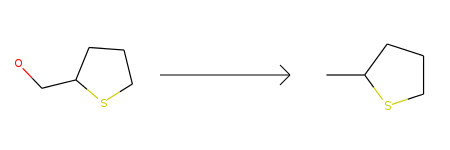

CC=CCCC=O>>CC=CCCCO


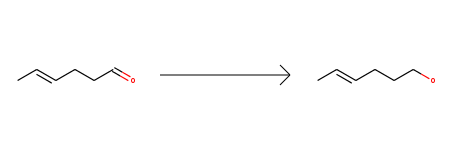

O=CC#CC=O>>O=CC#CCO


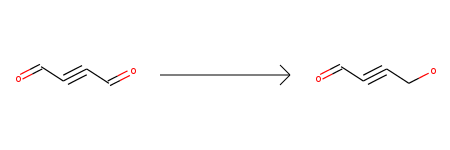

CNCC(N)CO>>CNCC(C)N


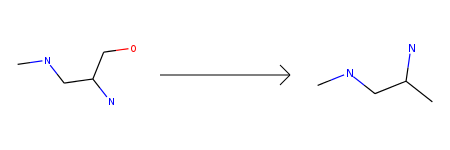

OCC(CS)CS>>CC(CS)CS


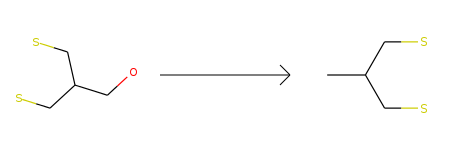

CCCCC(=O)O>>CCCCC=O


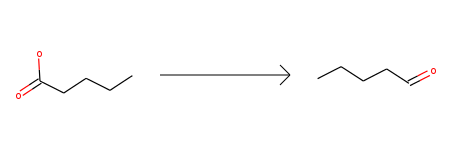

O=CCCCC=O>>O=CCCCCO


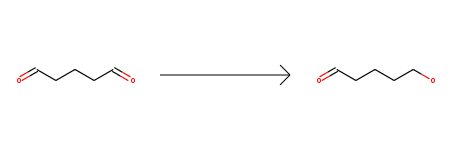

CCC=CCCCO>>CCC=CCCC


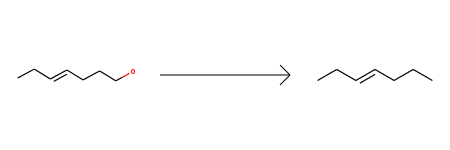

In [57]:
for rxn in rxn_list[:200]:
    print rxn
    display(AllChem.ReactionFromSmarts(rxn))

# Misc

Attempt at storing reactions in json File:

def reduce_metabolite(metabolite, json_file): #generates a list of redox reactions from a given metabolite smiles string
    with open(json_file, 'r') as fp:
        rxns = json.load(fp)
    rxn_list = []
    prod_list = G1_function(metabolite) + G2_function(metabolite) + G4_function(metabolite)
    temp = set(prod_list)
    for x in temp:
        rxn = metabolite + '>>' + x
        rxn_list.append(rxn)
    if len(prod_list) > 0:
        for rxn in rxn_list:
            if rxn not in rxns:
                with open(json_file, 'w') as fp:
                    json.dump(rxn, fp)
                print rxn
                display(AllChem.ReactionFromSmarts(rxn))
    if len(prod_list) > 0:
        for x in temp:
            reduce_metabolite(x, json_file)

Current recursive implementation of reduce metabolites function: 

def reduce_metabolite(metabolite): #generates a list of redox reactions from a given metabolite smiles string
    rxn_list = []
    prod_list = G1_function(metabolite) + G2_function(metabolite) + G4_function(metabolite)
    temp = set(prod_list)
    for x in temp:
        rxn = metabolite + '>>' + x
        rxn_list.append(rxn)
    if len(prod_list) > 0:
        for rxn in rxn_list:
            print rxn
            display(AllChem.ReactionFromSmarts(rxn))
    if len(prod_list) > 0:
        for x in temp:
            reduce_metabolite(x)